In [2]:
!pip install -U tensorflow

In [2]:
import tensorflow as tf
print("TensorFlow:", tf.__version__)

TensorFlow: 2.13.0


## 텐서와 연산

In [3]:
# 스칼라, 텐서를 생성
t1 = tf.constant(42)
print(t1)

# 배열을 가지고 생성
t2 = tf.constant([[1,2,3],[4,5,6]])
print(t2)

tf.Tensor(42, shape=(), dtype=int32)
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [4]:
# 인덱싱
print(t2[:, 1:]) # 행전체 그리고 열은 1번 부터 끝까지 선택
print(t2[:,1]) # 첫 번째 열만 선택 - 일차원 배열로 생성
print(t2[:,1,tf.newaxis]) # 첫 번째 열만 선택 - 다차원 배열로 생성
# tf.newaxis를 추가하면 차원이 하나 추가됨

tf.Tensor(
[[2 3]
 [5 6]], shape=(2, 2), dtype=int32)
tf.Tensor([2 5], shape=(2,), dtype=int32)
tf.Tensor(
[[2]
 [5]], shape=(2, 1), dtype=int32)


In [5]:
# 연산
print(t2 + 10) #broadcast 연산 수행
print(tf.square(t2)) # 제곱
print(t2 @ tf.transpose(t2))

tf.Tensor(
[[11 12 13]
 [14 15 16]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 1  4  9]
 [16 25 36]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[14 32]
 [32 77]], shape=(2, 2), dtype=int32)


In [6]:
from tensorflow import keras
K = keras.backend
print(t2)
K.square(K.transpose(t2)) + 10

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 26],
       [14, 35],
       [19, 46]])>

In [7]:
import numpy as np
ar = np.array([2,3,4])
print(np.sum(ar))

# numpy 배열을 가지고 Tensor 생성
x = tf.constant(ar)
print(x)

# Tensor를 numpy 배열로 변경
print(type(x.numpy())) # array

# numpy와 Tensor 연산에 데이터 공유 가능
print(tf.square(ar))
print(np.square(x))

9
tf.Tensor([2 3 4], shape=(3,), dtype=int32)
<class 'numpy.ndarray'>
tf.Tensor([ 4  9 16], shape=(3,), dtype=int32)
[ 4  9 16]


In [8]:
# 자료형이 달라서 에러 발생
try :
    print(tf.cast(tf.constant(10), tf.float32) + tf.constant(10.3))
except tf.errors.InvalidArgumentError as ex :
    print(ex)

tf.Tensor(20.3, shape=(), dtype=float32)


In [9]:
# 변수 생성
v = tf.Variable([[1,2,3],[4,5,6]])
print(v)
v.assign(5 + v)
print(v)
v[0,0].assign(42)
print(v)


<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[ 6,  7,  8],
       [ 9, 10, 11]])>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[42,  7,  8],
       [ 9, 10, 11]])>


### 문자열 Tensor

In [10]:
tf.constant("안녕하세요") #하나의 기본 자료형으로 인코딩 해서 저장



<tf.Tensor: shape=(), dtype=string, numpy=b'\xec\x95\x88\xeb\x85\x95\xed\x95\x98\xec\x84\xb8\xec\x9a\x94'>

In [11]:
# Tensor 배열 - 실수 3개를 저장하는 텐서 배열을 생성
array = tf.TensorArray(dtype=tf.float32, size=3)
# 3개의 데이터 저장(길이는 모두 같아야 함, 실수로 지정했기 때문에 1로 적으면 안되고 1.0으로 기입해야 함)
array = array.write(0,tf.constant([1.0,2.0]))
array = array.write(1,tf.constant([3.0,4.0]))
array = array.write(2,tf.constant([5.0,6.0]))
# 첫 번째 데이터 읽기
print(array.read(0))


tf.Tensor([1. 2.], shape=(2,), dtype=float32)


In [12]:
# ragged tensor : 각 배열의 길이가 달라도 됨
ar = tf.ragged.constant([[10, 20],[30,40,50],[50,60]])
print(ar)

<tf.RaggedTensor [[10, 20], [30, 40, 50], [50, 60]]>


In [13]:
# 희소 텐서 생성
# 3행 4열의 행렬을 만들고 indices 자리에 values의 값을 순서대로 배정한 희소 행렬
s = tf.SparseTensor(indices=[[0,1],[1,0],[2,3]],values = [1.0,2.0,3.0], dense_shape=[3,4])
print(tf.sparse.to_dense(s))

tf.Tensor(
[[0. 1. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 3.]], shape=(3, 4), dtype=float32)


In [14]:
s1 = tf.constant([[1,2,3,1], [2,4,5,8]])
s2 = tf.constant([[1,2,3,4], [2,7,5,8]])
print(s1)
print(s2)
print(tf.sparse.to_dense(tf.sets.union(s1,s2))) # 데이터 개수가 부족하면 0으로 채워짐
# set 연산은 배열로 리턴하기 때문에 연산의 결과 각 배열의 데이터 개수가 다르면 뒤에 0을 채워서 동일한 개수로 맞춰줌
# 1행을 합집합하면 데이터 4가지가 되고 2행은 7가지가 되므로 1행의 결과 뒤에 0을 3개 추가


tf.Tensor(
[[1 2 3 1]
 [2 4 5 8]], shape=(2, 4), dtype=int32)
tf.Tensor(
[[1 2 3 4]
 [2 7 5 8]], shape=(2, 4), dtype=int32)
tf.Tensor(
[[1 2 3 4 0]
 [2 4 5 7 8]], shape=(2, 5), dtype=int32)


In [15]:
# 노드 생성
node1 = tf.constant(3.0)
node2 = tf.constant(4.0)

# 그래프 실행
print(node1)
print(node2)


tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)


In [16]:
# 텐서플로우 코드 최적화가 가능하도록 작성
@tf.function
def tf_cube(x):
    print(x) # 값의 변화가 없는 구문이므로 함수 호출 전에 전부 수행해버림
    return x ** 3 # 텐서플로우 함수 호출 구문으로 변경돼서 실행
result = tf_cube(tf.constant(2.0))
print(result)


Tensor("x:0", shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)


In [17]:
# 2행 5열의 난수 발생 : 0에서 1사이에서 균등한 분포로
result = tf.random.uniform([2,5], 0.0, 1.0)
print(result)

tf.Tensor(
[[0.50242794 0.7692723  0.77397454 0.45626032 0.6405978 ]
 [0.46833146 0.5255765  0.50096047 0.3306328  0.8021544 ]], shape=(2, 5), dtype=float32)


In [18]:
# 2행 5열의 난수 발생 : 0에서 1사이에서 정규분포에서 평균은 0 표준 편차는 1
result = tf.random.normal([2,5], 0.0, 1.0)
print(result)

tf.Tensor(
[[-0.14035387  1.0007507  -0.4908224   0.4168492   0.09339133]
 [-1.0341338   1.6097533   0.09899427  1.3106738   1.4949021 ]], shape=(2, 5), dtype=float32)


## 뉴런 생성

In [19]:
# 활성화 함수 - 시그모이드

import math
def sigmoid(x):
    return 1/(1 + math.exp(-x))


In [20]:
# 입력 값
X = 1
# 타겟
y = 0
# 가중치를 랜덤하게 설정
w = tf.random.normal([1], 0, 1)
# 출력
output = sigmoid(X * w) # 입력값에 가중치 곱하기
print("예측값:", output)

예측값: 0.35367053376748137


In [21]:
# 경사 하강법
for i in range(1000): # 횟수 지정(에폭)
    output = sigmoid(X * w)
    error = y - output
    w = w + X * 0.1 * error # 학습률을 0.1로 설정
    if i % 50 == 0 :
        print(i, output, error)
# 속성이 많아지면 가중치의 개수도 그만큼 늘어남

0 0.35367053376748137 -0.35367053376748137
50 0.1486207057761963 -0.1486207057761963
100 0.08945246601567715 -0.08945246601567715
150 0.06320777523339834 -0.06320777523339834
200 0.048645998993486615 -0.048645998993486615
250 0.03945081344954132 -0.03945081344954132
300 0.033139090404210744 -0.033139090404210744
350 0.02854742442230917 -0.02854742442230917
400 0.02506132160985992 -0.02506132160985992
450 0.022326633458852187 -0.022326633458852187
500 0.02012531784087428 -0.02012531784087428
550 0.018315923605421763 -0.018315923605421763
600 0.016802811778493378 -0.016802811778493378
650 0.015519004728165435 -0.015519004728165435
700 0.01441627356977163 -0.01441627356977163
750 0.013458952544866652 -0.013458952544866652
800 0.01262020087363824 -0.01262020087363824
850 0.011879326030798363 -0.011879326030798363
900 0.011220205085120805 -0.011220205085120805
950 0.010630045625908097 -0.010630045625908097


In [22]:
# 경사 하강법 문제 발생
# 가중치 만을 곱하게 되는 경우 input이 0이면 가중치가 변경되지 않음

X = 0
y = 1
w = tf.random.normal([1], 0, 1)

for i in range(1000): # 횟수 지정(에폭)
    output = sigmoid(X * w)
    error = y - output
    w = w + X * 0.1 * error # 학습률을 0.1로 설정
    if i % 50 == 0 :
        print(i, output, error)


0 0.5 0.5
50 0.5 0.5
100 0.5 0.5
150 0.5 0.5
200 0.5 0.5
250 0.5 0.5
300 0.5 0.5
350 0.5 0.5
400 0.5 0.5
450 0.5 0.5
500 0.5 0.5
550 0.5 0.5
600 0.5 0.5
650 0.5 0.5
700 0.5 0.5
750 0.5 0.5
800 0.5 0.5
850 0.5 0.5
900 0.5 0.5
950 0.5 0.5


In [23]:
# 경사 하강법 문제 발생 -> 편향(b)을 추가해서 해결

X = 0
y = 1
w = tf.random.normal([1], 0, 1)

b = tf.random.normal([1], 0, 1)

for i in range(1000): # 횟수 지정(에폭)
    output = sigmoid(X * w + 1*b) # 그냥 b만 더해도 됨
    error = y - output
    w = w + X * 0.1 * error # 학습률을 0.1로 설정
    b = b + 1 * 0.1 * error # b가 0이 되지 않게끔 설정 추가
    if i % 50 == 0 :
        print(i, output, error)


0 0.6126635496170502 0.38733645038294984
50 0.8437392380712678 0.15626076192873217
100 0.9076392426955393 0.0923607573044607
150 0.9353119287074957 0.06468807129250431
200 0.9504683985034791 0.049531601496520916
250 0.959963235532045 0.04003676446795501
300 0.9664457988917625 0.03355420110823748
350 0.9711436419390099 0.028856358060990073
400 0.9747000678453246 0.02529993215467541
450 0.9774836801725001 0.02251631982749991
500 0.9797203510657942 0.020279648934205752
550 0.9815561181726227 0.01844388182737733
600 0.9830893838390028 0.016910616160997205
650 0.984388941420955 0.01561105857904499
700 0.9855042288470219 0.014495771152978065
750 0.9864716827281714 0.013528317271828572
800 0.9873187679229429 0.01268123207705707
850 0.9880665674752637 0.011933432524736332
900 0.988731514842208 0.011268485157791996
950 0.9893266135277871 0.010673386472212942


In [24]:
# AND를 뉴런으로 구현
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [0], [0], [1]])
b = tf.random.normal([1], 0, 1)
w = tf.random.normal([2], 0, 1) # 입력값이 2개이므로 [1]이 아닌 [2]로 지정해야 함(가중치 2개 생성)

for i in range(2000):
    # 오차의 합계를 저장할 변수
    error_sum = 0
    # 모든 입력을 대입해서 수행
    for j in range(4):
        output = sigmoid(np.sum(X[j]*w) + 1*b)
        error = y[j][0] - output
        w = w + X[j] * 0.1 * error
        b = b + 1 * 0.1 * error
        error_sum += error
    if i % 100 == 0 :
        print(i, error_sum)

0 -1.5646233098307585
100 -0.19130426381052135
200 -0.11803798084509032
300 -0.08645662840553242
400 -0.06829736389894
500 -0.05639891439597344
600 -0.04798206823975226
700 -0.041716198346393785
800 -0.03687287896592732
900 -0.033019917406841376
1000 -0.02988466860663075
1100 -0.027283019559989366
1200 -0.025092379141766416
1300 -0.02322163443082892
1400 -0.021607743765892445
1500 -0.02020080034569144
1600 -0.018963203494106712
1700 -0.017866714446748637
1800 -0.016887492232648266
1900 -0.016011344082709288


In [25]:
# predict
for i in range(4):
    print("X:", X[i], "Y:", y[i], "predict:", sigmoid(np.sum(X[i]*w)+b))
    

X: [0 0] Y: [0] predict: 2.467996222409919e-05
X: [0 1] Y: [0] predict: 0.025332076880705334
X: [1 0] Y: [0] predict: 0.02541042811899019
X: [1 1] Y: [1] predict: 0.9648589370421845


In [26]:
# OR를 경사 하강법으로

# OR를 뉴런으로 구현
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [1]])
b = tf.random.normal([1], 0, 1)
w = tf.random.normal([2], 0, 1) # 입력값이 2개이므로 [1]이 아닌 [2]로 지정해야 함(가중치 2개 생성)

for i in range(2000):
    # 오차의 합계를 저장할 변수
    error_sum = 0
    # 모든 입력을 대입해서 수행
    for j in range(4):
        output = sigmoid(np.sum(X[j]*w) + 1*b)
        error = y[j][0] - output
        w = w + X[j] * 0.1 * error
        b = b + 1 * 0.1 * error
        error_sum += error
    if i % 100 == 0 :
        print(i, error_sum)
        
# predict
for i in range(4):
    print("X:", X[i], "Y:", y[i], "predict:", sigmoid(np.sum(X[i]*w)+b))

0 1.2179519838198756
100 -0.08826589060082801
200 -0.04926054086320164
300 -0.03399041823761528
400 -0.025861425283018352
500 -0.020821271945826655
600 -0.017398671300572877
700 -0.014926565844055648
800 -0.013060297969218121
900 -0.01160295926385422
1000 -0.010434023220391761
1100 -0.009476455725622897
1200 -0.008677925335628348
1300 -0.008002077847673546
1400 -0.007423189822231169
1500 -0.0069211672910746425
1600 -0.006482168708426758
1700 -0.006095167769922815
1800 -0.00575182759793897
1900 -0.005443761113543326
X: [0 0] Y: [0] predict: 0.025630450012698817
X: [0 1] Y: [1] predict: 0.9897962589614261
X: [1 0] Y: [1] predict: 0.9897844629532497
X: [1 1] Y: [1] predict: 0.9999972012396627


In [27]:
# XOR를 경사 하강법으로

# XOR를 뉴런으로 구현
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])
b = tf.random.normal([1], 0, 1)
w = tf.random.normal([2], 0, 1) # 입력값이 2개이므로 [1]이 아닌 [2]로 지정해야 함(가중치 2개 생성)

for i in range(2000):
    # 오차의 합계를 저장할 변수
    error_sum = 0
    # 모든 입력을 대입해서 수행
    for j in range(4):
        output = sigmoid(np.sum(X[j]*w) + 1*b)
        error = y[j][0] - output
        w = w + X[j] * 0.1 * error
        b = b + 1 * 0.1 * error
        error_sum += error
    if i % 100 == 0 :
        print(i, error_sum)
        
# predict
for i in range(4):
    print("X:", X[i], "Y:", y[i], "predict:", sigmoid(np.sum(X[i]*w)+b))

0 0.6261555428677379
100 -0.02130599197696853
200 -0.00430617222360985
300 -0.0008684330380572813
400 -0.0001750965253387582
500 -3.53006972870773e-05
600 -7.1106194734493755e-06
700 -1.4426009705692522e-06
800 -2.9317380523252723e-07
900 -3.2574868358281606e-08
1000 -6.980329025907395e-08
1100 -6.980329025907395e-08
1200 -6.980329025907395e-08
1300 -6.980329025907395e-08
1400 -6.980329025907395e-08
1500 -6.980329025907395e-08
1600 -6.980329025907395e-08
1700 -6.980329025907395e-08
1800 -6.980329025907395e-08
1900 -6.980329025907395e-08
X: [0 0] Y: [0] predict: 0.5128177040587629
X: [0 1] Y: [1] predict: 0.5000000363215804
X: [1 0] Y: [1] predict: 0.48718236853665897
X: [1 1] Y: [0] predict: 0.4743815336379531


In [28]:
print("w:",w) # 값이 너무 작아서 입력한 X의 값을 반영을 잘 하지 못함
print("b:",b)

w: tf.Tensor([-0.10256381 -0.05128191], shape=(2,), dtype=float32)
b: tf.Tensor([0.05128205], shape=(1,), dtype=float32)


In [29]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid',
                         input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
# lr은 학습률

model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01), loss='mse')

model.summary()
# epochs 훈련 횟수
history = model.fit(X, y, epochs=20000,batch_size=1)

model.predict(X)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2799
Epoch 2/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2796
Epoch 3/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2792
Epoch 4/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2789
Epoch 5/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2785
Epoch 6/20000
4/4 [=

4/4 [==============================] - 0s 6ms/step - loss: 0.2597
Epoch 94/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2596
Epoch 95/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2595
Epoch 96/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2594
Epoch 97/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2593
Epoch 98/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2592
Epoch 99/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2591
Epoch 100/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2590
Epoch 101/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2589
Epoch 102/20000
4/4 [==============================] - 0s 538us/step - loss: 0.2587
Epoch 103/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2586
Epoch 104/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2585
Epoch 105/20000
4/4 [==================

4/4 [==============================] - 0s 4ms/step - loss: 0.2533
Epoch 194/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2533
Epoch 195/20000
4/4 [==============================] - 0s 621us/step - loss: 0.2533
Epoch 196/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2532
Epoch 197/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2532
Epoch 198/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2532
Epoch 199/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2532
Epoch 200/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2531
Epoch 201/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2531
Epoch 202/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2531
Epoch 203/20000
4/4 [==============================] - 0s 584us/step - loss: 0.2531
Epoch 204/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2530
Epoch 205/20000
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 0.2518
Epoch 294/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2518
Epoch 295/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2518
Epoch 296/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2517
Epoch 297/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2517
Epoch 298/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2517
Epoch 299/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2517
Epoch 300/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2517
Epoch 301/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2517
Epoch 302/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2517
Epoch 303/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2517
Epoch 304/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2517
Epoch 305/20000
4/4 [================

4/4 [==============================] - 0s 5ms/step - loss: 0.2514
Epoch 394/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2514
Epoch 395/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2514
Epoch 396/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2514
Epoch 397/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2514
Epoch 398/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2514
Epoch 399/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2514
Epoch 400/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2514
Epoch 401/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2513
Epoch 402/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2513
Epoch 403/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2513
Epoch 404/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2513
Epoch 405/20000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.2512
Epoch 494/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2512
Epoch 495/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2512
Epoch 496/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2512
Epoch 497/20000
4/4 [==============================] - 0s 583us/step - loss: 0.2512
Epoch 498/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2512
Epoch 499/20000
4/4 [==============================] - 0s 842us/step - loss: 0.2512
Epoch 500/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2512
Epoch 501/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2512
Epoch 502/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2512
Epoch 503/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2512
Epoch 504/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2512
Epoch 505/20000
4/4 [========

4/4 [==============================] - 0s 3ms/step - loss: 0.2512
Epoch 594/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2512
Epoch 595/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2512
Epoch 596/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2512
Epoch 597/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2512
Epoch 598/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2512
Epoch 599/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2512
Epoch 600/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2511
Epoch 601/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2511
Epoch 602/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2511
Epoch 603/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2511
Epoch 604/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 605/20000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 694/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 695/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 696/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 697/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 698/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 699/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2511
Epoch 700/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 701/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 702/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 703/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 704/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 705/20000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.2510
Epoch 794/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2510
Epoch 795/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2510
Epoch 796/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2510
Epoch 797/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2510
Epoch 798/20000
4/4 [==============================] - 0s 7ms/step - loss: 0.2510
Epoch 799/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2510
Epoch 800/20000
4/4 [==============================] - 0s 8ms/step - loss: 0.2510
Epoch 801/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2510
Epoch 802/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2510
Epoch 803/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2510
Epoch 804/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2510
Epoch 805/20000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.2510
Epoch 894/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2510
Epoch 895/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2510
Epoch 896/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2510
Epoch 897/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2510
Epoch 898/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2510
Epoch 899/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2510
Epoch 900/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2510
Epoch 901/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2510
Epoch 902/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2510
Epoch 903/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2510
Epoch 904/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2510
Epoch 905/20000
4/4 [=================

4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 994/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 995/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 996/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 997/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 998/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 999/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1000/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1001/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1002/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1003/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1004/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1005/20000
4/4 [=====

Epoch 1092/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1093/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1094/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1095/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1096/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1097/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1098/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1099/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1100/20000
4/4 [==============================] - 0s 665us/step - loss: 0.2509
Epoch 1101/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1102/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Epoch 1103/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2509
Ep

Epoch 1191/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 1192/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2508
Epoch 1193/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2508
Epoch 1194/20000
4/4 [==============================] - 0s 41us/step - loss: 0.2508
Epoch 1195/20000
4/4 [==============================] - 0s 698us/step - loss: 0.2508
Epoch 1196/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2508
Epoch 1197/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2508
Epoch 1198/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2508
Epoch 1199/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 1200/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 1201/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2508
Epoch 1202/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2508
Epo

4/4 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 1290/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 1291/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 1292/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 1293/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 1294/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2508
Epoch 1295/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 1296/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2508
Epoch 1297/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2508
Epoch 1298/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2508
Epoch 1299/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 1300/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 1301/20000
4/4 [

4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1388/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1389/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1390/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1391/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1392/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2507
Epoch 1393/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1394/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1395/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1396/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1397/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1398/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1399/20000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1487/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2507
Epoch 1488/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2507
Epoch 1489/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1490/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1491/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2507
Epoch 1492/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2507
Epoch 1493/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1494/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1495/20000
4/4 [==============================] - 0s 406us/step - loss: 0.2507
Epoch 1496/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2507
Epoch 1497/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1498/20000
4/4 

4/4 [==============================] - 0s 0s/step - loss: 0.2507
Epoch 1586/20000
4/4 [==============================] - 0s 408us/step - loss: 0.2507
Epoch 1587/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2507
Epoch 1588/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 1589/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2507
Epoch 1590/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2507
Epoch 1591/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2507
Epoch 1592/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2507
Epoch 1593/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2507
Epoch 1594/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1595/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2506
Epoch 1596/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1597/20000
4/4 [==

4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1685/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2506
Epoch 1686/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1687/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2506
Epoch 1688/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1689/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2506
Epoch 1690/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1691/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1692/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1693/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2506
Epoch 1694/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1695/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1696/20000
4/4 [=======

4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1784/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1785/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1786/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1787/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1788/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2506
Epoch 1789/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2506
Epoch 1790/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1791/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2506
Epoch 1792/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1793/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2506
Epoch 1794/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2506
Epoch 1795/20000
4/4 [=======

4/4 [==============================] - 0s 0s/step - loss: 0.2505
Epoch 1883/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2505
Epoch 1884/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2505
Epoch 1885/20000
4/4 [==============================] - 0s 7ms/step - loss: 0.2505
Epoch 1886/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2505
Epoch 1887/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2505
Epoch 1888/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2505
Epoch 1889/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2505
Epoch 1890/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2505
Epoch 1891/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2505
Epoch 1892/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2505
Epoch 1893/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2505
Epoch 1894/20000
4/4 [=====

4/4 [==============================] - 0s 0s/step - loss: 0.2505
Epoch 1982/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2505
Epoch 1983/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2505
Epoch 1984/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2505
Epoch 1985/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2505
Epoch 1986/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2505
Epoch 1987/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2505
Epoch 1988/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2505
Epoch 1989/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2505
Epoch 1990/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2505
Epoch 1991/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2505
Epoch 1992/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2505
Epoch 1993/20000
4/4 [=====

4/4 [==============================] - 0s 0s/step - loss: 0.2504
Epoch 2081/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2504
Epoch 2082/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2504
Epoch 2083/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2504
Epoch 2084/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2504
Epoch 2085/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2504
Epoch 2086/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2504
Epoch 2087/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2504
Epoch 2088/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2504
Epoch 2089/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2504
Epoch 2090/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2504
Epoch 2091/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2504
Epoch 2092/20000
4/4 [=======

4/4 [==============================] - 0s 5ms/step - loss: 0.2504
Epoch 2180/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2504
Epoch 2181/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2504
Epoch 2182/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2504
Epoch 2183/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2504
Epoch 2184/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2504
Epoch 2185/20000
4/4 [==============================] - 0s 361us/step - loss: 0.2504
Epoch 2186/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2504
Epoch 2187/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2504
Epoch 2188/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2504
Epoch 2189/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2504
Epoch 2190/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2504
Epoch 2191/20000
4/4 [=

4/4 [==============================] - 0s 1ms/step - loss: 0.2503
Epoch 2279/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2503
Epoch 2280/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2503
Epoch 2281/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2503
Epoch 2282/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2503
Epoch 2283/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2503
Epoch 2284/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2503
Epoch 2285/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2503
Epoch 2286/20000
4/4 [==============================] - 0s 216us/step - loss: 0.2503
Epoch 2287/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2503
Epoch 2288/20000
4/4 [==============================] - 0s 7ms/step - loss: 0.2503
Epoch 2289/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2503
Epoch 2290/20000
4/4

4/4 [==============================] - 0s 2ms/step - loss: 0.2503
Epoch 2377/20000
4/4 [==============================] - 0s 986us/step - loss: 0.2503
Epoch 2378/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2503
Epoch 2379/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2503
Epoch 2380/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2503
Epoch 2381/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2503
Epoch 2382/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2503
Epoch 2383/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2503
Epoch 2384/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2502
Epoch 2385/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2503
Epoch 2386/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2502
Epoch 2387/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2502
Epoch 2388/20000
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.2502
Epoch 2476/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2502
Epoch 2477/20000
4/4 [==============================] - 0s 355us/step - loss: 0.2502
Epoch 2478/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2502
Epoch 2479/20000
4/4 [==============================] - 0s 319us/step - loss: 0.2502
Epoch 2480/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2502
Epoch 2481/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2502
Epoch 2482/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2502
Epoch 2483/20000
4/4 [==============================] - 0s 290us/step - loss: 0.2502
Epoch 2484/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2502
Epoch 2485/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2502
Epoch 2486/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2502
Epoch 2487/20000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 2575/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 2576/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 2577/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 2578/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 2579/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 2580/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 2581/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 2582/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2501
Epoch 2583/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2501
Epoch 2584/20000
4/4 [==============================] - 0s 409us/step - loss: 0.2501
Epoch 2585/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 2586/20000
4/4

4/4 [==============================] - 0s 4ms/step - loss: 0.2501
Epoch 2674/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2501
Epoch 2675/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2501
Epoch 2676/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2501
Epoch 2677/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 2678/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2501
Epoch 2679/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2501
Epoch 2680/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2501
Epoch 2681/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2501
Epoch 2682/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 2683/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 2684/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 2685/20000
4/4 [=

4/4 [==============================] - 0s 0s/step - loss: 0.2500
Epoch 2773/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2500
Epoch 2774/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2500
Epoch 2775/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2500
Epoch 2776/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2500
Epoch 2777/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2500
Epoch 2778/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2500
Epoch 2779/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2500
Epoch 2780/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2500
Epoch 2781/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2500
Epoch 2782/20000
4/4 [==============================] - 0s 347us/step - loss: 0.2500
Epoch 2783/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2500
Epoch 2784/20000
4/4 [===

4/4 [==============================] - 0s 0s/step - loss: 0.2500
Epoch 2872/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2500
Epoch 2873/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2500
Epoch 2874/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2500
Epoch 2875/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2500
Epoch 2876/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2500
Epoch 2877/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 2878/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 2879/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 2880/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 2881/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2500
Epoch 2882/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2500
Epoch 2883/20000
4/4 [======

4/4 [==============================] - 0s 579us/step - loss: 0.2499
Epoch 2971/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2499
Epoch 2972/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2499
Epoch 2973/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2499
Epoch 2974/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2499
Epoch 2975/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2499
Epoch 2976/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2499
Epoch 2977/20000
4/4 [==============================] - 0s 40us/step - loss: 0.2499
Epoch 2978/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2499
Epoch 2979/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2499
Epoch 2980/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2499
Epoch 2981/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2499
Epoch 2982/20000
4/4

4/4 [==============================] - 0s 2ms/step - loss: 0.2498
Epoch 3070/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2498
Epoch 3071/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2498
Epoch 3072/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2498
Epoch 3073/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2498
Epoch 3074/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2498
Epoch 3075/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2498
Epoch 3076/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2498
Epoch 3077/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2498
Epoch 3078/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2498
Epoch 3079/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2498
Epoch 3080/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2498
Epoch 3081/20000
4/4 [

4/4 [==============================] - 0s 1ms/step - loss: 0.2498
Epoch 3169/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2498
Epoch 3170/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2498
Epoch 3171/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2498
Epoch 3172/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2498
Epoch 3173/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2498
Epoch 3174/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2498
Epoch 3175/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2498
Epoch 3176/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2498
Epoch 3177/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2498
Epoch 3178/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2498
Epoch 3179/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2498
Epoch 3180/20000
4/4 [====

4/4 [==============================] - 0s 7ms/step - loss: 0.2497
Epoch 3268/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2497
Epoch 3269/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2497
Epoch 3270/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2497
Epoch 3271/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2497
Epoch 3272/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2497
Epoch 3273/20000
4/4 [==============================] - 0s 326us/step - loss: 0.2497
Epoch 3274/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2497
Epoch 3275/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2497
Epoch 3276/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2497
Epoch 3277/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2497
Epoch 3278/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2497
Epoch 3279/20000
4/4 [=

4/4 [==============================] - 0s 5ms/step - loss: 0.2496
Epoch 3367/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2496
Epoch 3368/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2496
Epoch 3369/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2496
Epoch 3370/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2496
Epoch 3371/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2496
Epoch 3372/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2496
Epoch 3373/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2496
Epoch 3374/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2496
Epoch 3375/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2496
Epoch 3376/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2496
Epoch 3377/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2496
Epoch 3378/20000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.2495
Epoch 3466/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2495
Epoch 3467/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2495
Epoch 3468/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2495
Epoch 3469/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2495
Epoch 3470/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2495
Epoch 3471/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2495
Epoch 3472/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2495
Epoch 3473/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2495
Epoch 3474/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2495
Epoch 3475/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2495
Epoch 3476/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2495
Epoch 3477/20000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.2494
Epoch 3565/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2494
Epoch 3566/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2494
Epoch 3567/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2494
Epoch 3568/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2494
Epoch 3569/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2494
Epoch 3570/20000
4/4 [==============================] - 0s 995us/step - loss: 0.2494
Epoch 3571/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2494
Epoch 3572/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2494
Epoch 3573/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2494
Epoch 3574/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2494
Epoch 3575/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2494
Epoch 3576/20000
4/4 [=

4/4 [==============================] - 0s 5ms/step - loss: 0.2494
Epoch 3664/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2494
Epoch 3665/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2494
Epoch 3666/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2494
Epoch 3667/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2493
Epoch 3668/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2493
Epoch 3669/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2493
Epoch 3670/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2493
Epoch 3671/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2493
Epoch 3672/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2493
Epoch 3673/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2493
Epoch 3674/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2493
Epoch 3675/20000
4/4 [==========

4/4 [==============================] - 0s 2ms/step - loss: 0.2493
Epoch 3763/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2493
Epoch 3764/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2493
Epoch 3765/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2493
Epoch 3766/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2493
Epoch 3767/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2493
Epoch 3768/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2493
Epoch 3769/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2493
Epoch 3770/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2493
Epoch 3771/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2493
Epoch 3772/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2493
Epoch 3773/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2492
Epoch 3774/20000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 3862/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 3863/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 3864/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 3865/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 3866/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 3867/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 3868/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 3869/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 3870/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 3871/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 3872/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 3873/20000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.2491
Epoch 3961/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2491
Epoch 3962/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2491
Epoch 3963/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2491
Epoch 3964/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2491
Epoch 3965/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2491
Epoch 3966/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2491
Epoch 3967/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2491
Epoch 3968/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2491
Epoch 3969/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2491
Epoch 3970/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2490
Epoch 3971/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2490
Epoch 3972/20000
4/4 [==

4/4 [==============================] - 0s 1ms/step - loss: 0.2490
Epoch 4060/20000
4/4 [==============================] - 0s 549us/step - loss: 0.2490
Epoch 4061/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2489
Epoch 4062/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2489
Epoch 4063/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2489
Epoch 4064/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2489
Epoch 4065/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2489
Epoch 4066/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2489
Epoch 4067/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2489
Epoch 4068/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2489
Epoch 4069/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2489
Epoch 4070/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2489
Epoch 4071/20000
4/4 [====

4/4 [==============================] - 0s 2ms/step - loss: 0.2488
Epoch 4159/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2488
Epoch 4160/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2488
Epoch 4161/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2488
Epoch 4162/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2488
Epoch 4163/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2488
Epoch 4164/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2488
Epoch 4165/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2488
Epoch 4166/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2488
Epoch 4167/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2488
Epoch 4168/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2488
Epoch 4169/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2488
Epoch 4170/20000
4/4 [====

4/4 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 4258/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2487
Epoch 4259/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2487
Epoch 4260/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2487
Epoch 4261/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 4262/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 4263/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 4264/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2487
Epoch 4265/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 4266/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 4267/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 4268/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 4269/20000
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.2486
Epoch 4356/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2486
Epoch 4357/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2486
Epoch 4358/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2486
Epoch 4359/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2486
Epoch 4360/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2486
Epoch 4361/20000
4/4 [==============================] - 0s 312us/step - loss: 0.2486
Epoch 4362/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2486
Epoch 4363/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2486
Epoch 4364/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2486
Epoch 4365/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2486
Epoch 4366/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2486
Epoch 4367/20000
4/

4/4 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 4454/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 4455/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 4456/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 4457/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 4458/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 4459/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 4460/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 4461/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 4462/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2484
Epoch 4463/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2484
Epoch 4464/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2484
Epoch 4465/20000
4/4 

4/4 [==============================] - 0s 5ms/step - loss: 0.2483
Epoch 4552/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2483
Epoch 4553/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2483
Epoch 4554/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2483
Epoch 4555/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2483
Epoch 4556/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2483
Epoch 4557/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2483
Epoch 4558/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2483
Epoch 4559/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2483
Epoch 4560/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2483
Epoch 4561/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2483
Epoch 4562/20000
4/4 [==============================] - 0s 911us/step - loss: 0.2483
Epoch 4563/20000
4/

4/4 [==============================] - 0s 0s/step - loss: 0.2482
Epoch 4651/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2482
Epoch 4652/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2482
Epoch 4653/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2482
Epoch 4654/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2482
Epoch 4655/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2482
Epoch 4656/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2482
Epoch 4657/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2482
Epoch 4658/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2482
Epoch 4659/20000
4/4 [==============================] - 0s 688us/step - loss: 0.2482
Epoch 4660/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2482
Epoch 4661/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2482
Epoch 4662/20000
4/4 [===

4/4 [==============================] - 0s 2ms/step - loss: 0.2480
Epoch 4750/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2480
Epoch 4751/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2480
Epoch 4752/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2480
Epoch 4753/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2480
Epoch 4754/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2480
Epoch 4755/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2480
Epoch 4756/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2480
Epoch 4757/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2480
Epoch 4758/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2480
Epoch 4759/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2480
Epoch 4760/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2480
Epoch 4761/20000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.2479
Epoch 4849/20000
4/4 [==============================] - 0s 494us/step - loss: 0.2479
Epoch 4850/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2479
Epoch 4851/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2479
Epoch 4852/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2479
Epoch 4853/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2479
Epoch 4854/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2478
Epoch 4855/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2478
Epoch 4856/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2478
Epoch 4857/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2478
Epoch 4858/20000
4/4 [==============================] - 0s 698us/step - loss: 0.2478
Epoch 4859/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2478
Epoch 4860/20000
4/4

4/4 [==============================] - 0s 1ms/step - loss: 0.2477
Epoch 4948/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2477
Epoch 4949/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2477
Epoch 4950/20000
4/4 [==============================] - 0s 773us/step - loss: 0.2477
Epoch 4951/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2477
Epoch 4952/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2477
Epoch 4953/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2477
Epoch 4954/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2477
Epoch 4955/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2477
Epoch 4956/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2477
Epoch 4957/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2477
Epoch 4958/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2477
Epoch 4959/20000
4/4 [=

4/4 [==============================] - 0s 1ms/step - loss: 0.2475
Epoch 5047/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2475
Epoch 5048/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2475
Epoch 5049/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2475
Epoch 5050/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2475
Epoch 5051/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2475
Epoch 5052/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2475
Epoch 5053/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2475
Epoch 5054/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2475
Epoch 5055/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2475
Epoch 5056/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2475
Epoch 5057/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2475
Epoch 5058/20000
4/4 [======

4/4 [==============================] - 0s 0s/step - loss: 0.2473
Epoch 5146/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2473
Epoch 5147/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2473
Epoch 5148/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2473
Epoch 5149/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2473
Epoch 5150/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2473
Epoch 5151/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2473
Epoch 5152/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2473
Epoch 5153/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2473
Epoch 5154/20000
4/4 [==============================] - 0s 200us/step - loss: 0.2473
Epoch 5155/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2473
Epoch 5156/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2473
Epoch 5157/20000
4/4 [===

4/4 [==============================] - 0s 2ms/step - loss: 0.2471
Epoch 5245/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2471
Epoch 5246/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2471
Epoch 5247/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2471
Epoch 5248/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2471
Epoch 5249/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2471
Epoch 5250/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2471
Epoch 5251/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2471
Epoch 5252/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2471
Epoch 5253/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2471
Epoch 5254/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2471
Epoch 5255/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2471
Epoch 5256/20000
4/4 

4/4 [==============================] - 0s 0s/step - loss: 0.2469
Epoch 5344/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2469
Epoch 5345/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2469
Epoch 5346/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2469
Epoch 5347/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2469
Epoch 5348/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2469
Epoch 5349/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2469
Epoch 5350/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2469
Epoch 5351/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2469
Epoch 5352/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2469
Epoch 5353/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2469
Epoch 5354/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2469
Epoch 5355/20000
4/4 [========

4/4 [==============================] - 0s 0s/step - loss: 0.2467
Epoch 5443/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2467
Epoch 5444/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2467
Epoch 5445/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2467
Epoch 5446/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2467
Epoch 5447/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2467
Epoch 5448/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2467
Epoch 5449/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2467
Epoch 5450/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2467
Epoch 5451/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2467
Epoch 5452/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2467
Epoch 5453/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2467
Epoch 5454/20000
4/4 [==========

4/4 [==============================] - 0s 5ms/step - loss: 0.2465
Epoch 5542/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2465
Epoch 5543/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2465
Epoch 5544/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2464
Epoch 5545/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2464
Epoch 5546/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2464
Epoch 5547/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2464
Epoch 5548/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2464
Epoch 5549/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2464
Epoch 5550/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2464
Epoch 5551/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2464
Epoch 5552/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2464
Epoch 5553/20000
4/4 [========

4/4 [==============================] - 0s 0s/step - loss: 0.2462
Epoch 5641/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2462
Epoch 5642/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2462
Epoch 5643/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2462
Epoch 5644/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2462
Epoch 5645/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2462
Epoch 5646/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2462
Epoch 5647/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2462
Epoch 5648/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2462
Epoch 5649/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2462
Epoch 5650/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2462
Epoch 5651/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2462
Epoch 5652/20000
4/4 [=========

4/4 [==============================] - 0s 0s/step - loss: 0.2460
Epoch 5740/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2460
Epoch 5741/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2460
Epoch 5742/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2459
Epoch 5743/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2459
Epoch 5744/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2459
Epoch 5745/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2459
Epoch 5746/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2459
Epoch 5747/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2459
Epoch 5748/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2459
Epoch 5749/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2459
Epoch 5750/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2459
Epoch 5751/20000
4/4 [====

4/4 [==============================] - 0s 374us/step - loss: 0.2457
Epoch 5839/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2457
Epoch 5840/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2457
Epoch 5841/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2457
Epoch 5842/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2457
Epoch 5843/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2457
Epoch 5844/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2457
Epoch 5845/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2457
Epoch 5846/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2457
Epoch 5847/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2457
Epoch 5848/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2457
Epoch 5849/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2457
Epoch 5850/20000
4/4 [======

4/4 [==============================] - 0s 2ms/step - loss: 0.2454
Epoch 5938/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2454
Epoch 5939/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2454
Epoch 5940/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2454
Epoch 5941/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2454
Epoch 5942/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2454
Epoch 5943/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2454
Epoch 5944/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2454
Epoch 5945/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2454
Epoch 5946/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2454
Epoch 5947/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2454
Epoch 5948/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2454
Epoch 5949/20000
4/4 

4/4 [==============================] - 0s 0s/step - loss: 0.2451
Epoch 6037/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2451
Epoch 6038/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2451
Epoch 6039/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2451
Epoch 6040/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2451
Epoch 6041/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2451
Epoch 6042/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2451
Epoch 6043/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2451
Epoch 6044/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2451
Epoch 6045/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2451
Epoch 6046/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2451
Epoch 6047/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2451
Epoch 6048/20000
4/4 [==========

4/4 [==============================] - 0s 0s/step - loss: 0.2448
Epoch 6136/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2448
Epoch 6137/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2448
Epoch 6138/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2448
Epoch 6139/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2448
Epoch 6140/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2448
Epoch 6141/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2448
Epoch 6142/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2448
Epoch 6143/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2448
Epoch 6144/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2448
Epoch 6145/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2448
Epoch 6146/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2448
Epoch 6147/20000
4/4 [===

4/4 [==============================] - 0s 1ms/step - loss: 0.2445
Epoch 6235/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2445
Epoch 6236/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2445
Epoch 6237/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2445
Epoch 6238/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2445
Epoch 6239/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2445
Epoch 6240/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2445
Epoch 6241/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2445
Epoch 6242/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2445
Epoch 6243/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2445
Epoch 6244/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2445
Epoch 6245/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2445
Epoch 6246/20000
4/4 

Epoch 6333/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2442
Epoch 6334/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2442
Epoch 6335/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2441
Epoch 6336/20000
4/4 [==============================] - 0s 605us/step - loss: 0.2441
Epoch 6337/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2441
Epoch 6338/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2441
Epoch 6339/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2441
Epoch 6340/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2441
Epoch 6341/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2441
Epoch 6342/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2441
Epoch 6343/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2441
Epoch 6344/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2441
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 6433/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2438
Epoch 6434/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 6435/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 6436/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 6437/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2438
Epoch 6438/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2438
Epoch 6439/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 6440/20000
4/4 [==============================] - 0s 56us/step - loss: 0.2438
Epoch 6441/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2438
Epoch 6442/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2438
Epoch 6443/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2438
Epoch 6444/20000
4/4 [

4/4 [==============================] - 0s 2ms/step - loss: 0.2434
Epoch 6532/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2434
Epoch 6533/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2434
Epoch 6534/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2434
Epoch 6535/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2434
Epoch 6536/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2434
Epoch 6537/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2434
Epoch 6538/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2434
Epoch 6539/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2434
Epoch 6540/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2434
Epoch 6541/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2434
Epoch 6542/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2434
Epoch 6543/20000
4/4 [====

4/4 [==============================] - 0s 0s/step - loss: 0.2431
Epoch 6631/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2431
Epoch 6632/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2431
Epoch 6633/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2430
Epoch 6634/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2430
Epoch 6635/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2430
Epoch 6636/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2430
Epoch 6637/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2430
Epoch 6638/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2430
Epoch 6639/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2430
Epoch 6640/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2430
Epoch 6641/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2430
Epoch 6642/20000
4/4 [====

4/4 [==============================] - 0s 0s/step - loss: 0.2427
Epoch 6730/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2427
Epoch 6731/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2427
Epoch 6732/20000
4/4 [==============================] - 0s 733us/step - loss: 0.2426
Epoch 6733/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2426
Epoch 6734/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2426
Epoch 6735/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2426
Epoch 6736/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2426
Epoch 6737/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2426
Epoch 6738/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2426
Epoch 6739/20000
4/4 [==============================] - 0s 926us/step - loss: 0.2426
Epoch 6740/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2426
Epoch 6741/20000
4/

4/4 [==============================] - 0s 2ms/step - loss: 0.2422
Epoch 6829/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2422
Epoch 6830/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2422
Epoch 6831/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2422
Epoch 6832/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2422
Epoch 6833/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2422
Epoch 6834/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2422
Epoch 6835/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2422
Epoch 6836/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2422
Epoch 6837/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2422
Epoch 6838/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2422
Epoch 6839/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2422
Epoch 6840/20000
4/4 

4/4 [==============================] - 0s 3ms/step - loss: 0.2418
Epoch 6928/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2418
Epoch 6929/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2418
Epoch 6930/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2418
Epoch 6931/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2418
Epoch 6932/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2418
Epoch 6933/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2418
Epoch 6934/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2418
Epoch 6935/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2418
Epoch 6936/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2418
Epoch 6937/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2418
Epoch 6938/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2418
Epoch 6939/20000
4/4 [==

4/4 [==============================] - 0s 5ms/step - loss: 0.2414
Epoch 7027/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2414
Epoch 7028/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2414
Epoch 7029/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2414
Epoch 7030/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2414
Epoch 7031/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2414
Epoch 7032/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2413
Epoch 7033/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2413
Epoch 7034/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2413
Epoch 7035/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2413
Epoch 7036/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2413
Epoch 7037/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2413
Epoch 7038/20000
4/4 [=====

Epoch 7125/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2409
Epoch 7126/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2409
Epoch 7127/20000
4/4 [==============================] - 0s 424us/step - loss: 0.2409
Epoch 7128/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2409
Epoch 7129/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2409
Epoch 7130/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2409
Epoch 7131/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2409
Epoch 7132/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2409
Epoch 7133/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2409
Epoch 7134/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2409
Epoch 7135/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2409
Epoch 7136/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2409
Epoch

4/4 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 7224/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 7225/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 7226/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 7227/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 7228/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 7229/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 7230/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 7231/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 7232/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 7233/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2404
Epoch 7234/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 7235/20000
4/4 [

4/4 [==============================] - 0s 2ms/step - loss: 0.2399
Epoch 7322/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399
Epoch 7323/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399
Epoch 7324/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399
Epoch 7325/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399
Epoch 7326/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399
Epoch 7327/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399
Epoch 7328/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2399
Epoch 7329/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399
Epoch 7330/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399
Epoch 7331/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399
Epoch 7332/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2399
Epoch 7333/20000
4/4 

Epoch 7420/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2394
Epoch 7421/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2394
Epoch 7422/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2394
Epoch 7423/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2394
Epoch 7424/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2394
Epoch 7425/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2394
Epoch 7426/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2394
Epoch 7427/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2394
Epoch 7428/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2394
Epoch 7429/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2394
Epoch 7430/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2394
Epoch 7431/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2394
Epoc

4/4 [==============================] - 0s 2ms/step - loss: 0.2389
Epoch 7519/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2389
Epoch 7520/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2389
Epoch 7521/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2389
Epoch 7522/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2389
Epoch 7523/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2389
Epoch 7524/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2389
Epoch 7525/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2389
Epoch 7526/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2389
Epoch 7527/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2388
Epoch 7528/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2388
Epoch 7529/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2388
Epoch 7530/20000
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.2383
Epoch 7618/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2383
Epoch 7619/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2383
Epoch 7620/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2383
Epoch 7621/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2383
Epoch 7622/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2383
Epoch 7623/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2383
Epoch 7624/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2383
Epoch 7625/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2383
Epoch 7626/20000
4/4 [==============================] - 0s 7ms/step - loss: 0.2383
Epoch 7627/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2383
Epoch 7628/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2383
Epoch 7629/20000
4/4 [===

4/4 [==============================] - 0s 0s/step - loss: 0.2378
Epoch 7717/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2378
Epoch 7718/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2378
Epoch 7719/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2378
Epoch 7720/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2377
Epoch 7721/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2377
Epoch 7722/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2377
Epoch 7723/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2377
Epoch 7724/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2377
Epoch 7725/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2377
Epoch 7726/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2377
Epoch 7727/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2377
Epoch 7728/20000
4/4 [=======

4/4 [==============================] - 0s 0s/step - loss: 0.2372
Epoch 7816/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2372
Epoch 7817/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2372
Epoch 7818/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2372
Epoch 7819/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2372
Epoch 7820/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2371
Epoch 7821/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2371
Epoch 7822/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2371
Epoch 7823/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2371
Epoch 7824/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2371
Epoch 7825/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2371
Epoch 7826/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2371
Epoch 7827/20000
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 0.2366
Epoch 7915/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2366
Epoch 7916/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2366
Epoch 7917/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2365
Epoch 7918/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2365
Epoch 7919/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2365
Epoch 7920/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2365
Epoch 7921/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2365
Epoch 7922/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2365
Epoch 7923/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2365
Epoch 7924/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2365
Epoch 7925/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2365
Epoch 7926/20000
4/4 [======

4/4 [==============================] - 0s 2ms/step - loss: 0.2359
Epoch 8014/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2359
Epoch 8015/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2359
Epoch 8016/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2359
Epoch 8017/20000
4/4 [==============================] - 0s 722us/step - loss: 0.2359
Epoch 8018/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2359
Epoch 8019/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2359
Epoch 8020/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2359
Epoch 8021/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2359
Epoch 8022/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2359
Epoch 8023/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2359
Epoch 8024/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2359
Epoch 8025/20000
4/4 [=

4/4 [==============================] - 0s 0s/step - loss: 0.2353
Epoch 8113/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2353
Epoch 8114/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2353
Epoch 8115/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2353
Epoch 8116/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2353
Epoch 8117/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2352
Epoch 8118/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2352
Epoch 8119/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2352
Epoch 8120/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2352
Epoch 8121/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2352
Epoch 8122/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2352
Epoch 8123/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2352
Epoch 8124/20000
4/4 [======

4/4 [==============================] - 0s 0s/step - loss: 0.2346
Epoch 8212/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2346
Epoch 8213/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2346
Epoch 8214/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2346
Epoch 8215/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2346
Epoch 8216/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2346
Epoch 8217/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2346
Epoch 8218/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2346
Epoch 8219/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2346
Epoch 8220/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2346
Epoch 8221/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2345
Epoch 8222/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2345
Epoch 8223/20000
4/4 [====

4/4 [==============================] - 0s 2ms/step - loss: 0.2339
Epoch 8311/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2339
Epoch 8312/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2339
Epoch 8313/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2339
Epoch 8314/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2339
Epoch 8315/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2339
Epoch 8316/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2339
Epoch 8317/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2339
Epoch 8318/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2339
Epoch 8319/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2339
Epoch 8320/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2339
Epoch 8321/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2338
Epoch 8322/20000
4/4 [==

Epoch 8409/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2332
Epoch 8410/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2332
Epoch 8411/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2332
Epoch 8412/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2332
Epoch 8413/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2332
Epoch 8414/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2332
Epoch 8415/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2332
Epoch 8416/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2332
Epoch 8417/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2332
Epoch 8418/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2331
Epoch 8419/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2331
Epoch 8420/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2331
Epoc

4/4 [==============================] - 0s 2ms/step - loss: 0.2325
Epoch 8508/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2325
Epoch 8509/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2325
Epoch 8510/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2325
Epoch 8511/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2325
Epoch 8512/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2325
Epoch 8513/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2324
Epoch 8514/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2324
Epoch 8515/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2324
Epoch 8516/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2324
Epoch 8517/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2324
Epoch 8518/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2324
Epoch 8519/20000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.2317
Epoch 8607/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2317
Epoch 8608/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2317
Epoch 8609/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2317
Epoch 8610/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2317
Epoch 8611/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2317
Epoch 8612/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2317
Epoch 8613/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2317
Epoch 8614/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2317
Epoch 8615/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2317
Epoch 8616/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2317
Epoch 8617/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2317
Epoch 8618/20000
4/4 [==

4/4 [==============================] - 0s 0s/step - loss: 0.2310
Epoch 8706/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2310
Epoch 8707/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2310
Epoch 8708/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2309
Epoch 8709/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2309
Epoch 8710/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2309
Epoch 8711/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2309
Epoch 8712/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2309
Epoch 8713/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2309
Epoch 8714/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2309
Epoch 8715/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2309
Epoch 8716/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2309
Epoch 8717/20000
4/4 [======

4/4 [==============================] - 0s 0s/step - loss: 0.2302
Epoch 8805/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2302
Epoch 8806/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2302
Epoch 8807/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2302
Epoch 8808/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2302
Epoch 8809/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2301
Epoch 8810/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2301
Epoch 8811/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2301
Epoch 8812/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2301
Epoch 8813/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2301
Epoch 8814/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2301
Epoch 8815/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2301
Epoch 8816/20000
4/4 [=====

4/4 [==============================] - 0s 5ms/step - loss: 0.2294
Epoch 8904/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2294
Epoch 8905/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2294
Epoch 8906/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2294
Epoch 8907/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2293
Epoch 8908/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2293
Epoch 8909/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2293
Epoch 8910/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2293
Epoch 8911/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2293
Epoch 8912/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2293
Epoch 8913/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2293
Epoch 8914/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2293
Epoch 8915/20000
4/4 [=======

4/4 [==============================] - 0s 5ms/step - loss: 0.2286
Epoch 9003/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2285
Epoch 9004/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2285
Epoch 9005/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2285
Epoch 9006/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2285
Epoch 9007/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2285
Epoch 9008/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2285
Epoch 9009/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2285
Epoch 9010/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2285
Epoch 9011/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2285
Epoch 9012/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2285
Epoch 9013/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2285
Epoch 9014/20000
4/4 [=====

4/4 [==============================] - 0s 0s/step - loss: 0.2277
Epoch 9102/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2277
Epoch 9103/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2277
Epoch 9104/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2277
Epoch 9105/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2277
Epoch 9106/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2277
Epoch 9107/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2277
Epoch 9108/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2276
Epoch 9109/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2276
Epoch 9110/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2276
Epoch 9111/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2276
Epoch 9112/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2276
Epoch 9113/20000
4/4 [======

4/4 [==============================] - 0s 0s/step - loss: 0.2269
Epoch 9201/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2268
Epoch 9202/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2268
Epoch 9203/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2268
Epoch 9204/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2268
Epoch 9205/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2268
Epoch 9206/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2268
Epoch 9207/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2268
Epoch 9208/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2268
Epoch 9209/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2268
Epoch 9210/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2268
Epoch 9211/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2268
Epoch 9212/20000
4/4 [=======

4/4 [==============================] - 0s 0s/step - loss: 0.2260
Epoch 9300/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2260
Epoch 9301/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2260
Epoch 9302/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2259
Epoch 9303/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2259
Epoch 9304/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2259
Epoch 9305/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2259
Epoch 9306/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2259
Epoch 9307/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2259
Epoch 9308/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2259
Epoch 9309/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2259
Epoch 9310/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2259
Epoch 9311/20000
4/4 [=====

4/4 [==============================] - 0s 0s/step - loss: 0.2251
Epoch 9399/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2251
Epoch 9400/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2251
Epoch 9401/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2251
Epoch 9402/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2250
Epoch 9403/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2250
Epoch 9404/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2250
Epoch 9405/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2250
Epoch 9406/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2250
Epoch 9407/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2250
Epoch 9408/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2250
Epoch 9409/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2250
Epoch 9410/20000
4/4 [==========

4/4 [==============================] - 0s 2ms/step - loss: 0.2242
Epoch 9498/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2242
Epoch 9499/20000
4/4 [==============================] - 0s 338us/step - loss: 0.2242
Epoch 9500/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2242
Epoch 9501/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2241
Epoch 9502/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2241
Epoch 9503/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2241
Epoch 9504/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2241
Epoch 9505/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2241
Epoch 9506/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2241
Epoch 9507/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2241
Epoch 9508/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2241
Epoch 9509/20000
4/4 [===

4/4 [==============================] - 0s 5ms/step - loss: 0.2233
Epoch 9597/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2233
Epoch 9598/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2232
Epoch 9599/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2232
Epoch 9600/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2232
Epoch 9601/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2232
Epoch 9602/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2232
Epoch 9603/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2232
Epoch 9604/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2232
Epoch 9605/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2232
Epoch 9606/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2232
Epoch 9607/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2232
Epoch 9608/20000
4/4 [====

4/4 [==============================] - 0s 0s/step - loss: 0.2223
Epoch 9696/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2223
Epoch 9697/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2223
Epoch 9698/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.2223
Epoch 9699/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2223
Epoch 9700/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2223
Epoch 9701/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2223
Epoch 9702/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2223
Epoch 9703/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2223
Epoch 9704/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2222
Epoch 9705/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2222
Epoch 9706/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2222
Epoch 9707/20000
4/4 [=======

4/4 [==============================] - 0s 0s/step - loss: 0.2214
Epoch 9795/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2214
Epoch 9796/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2214
Epoch 9797/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2214
Epoch 9798/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2213
Epoch 9799/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2213
Epoch 9800/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2213
Epoch 9801/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2213
Epoch 9802/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2213
Epoch 9803/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2213
Epoch 9804/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2213
Epoch 9805/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2213
Epoch 9806/20000
4/4 [=====

4/4 [==============================] - 0s 5ms/step - loss: 0.2204
Epoch 9894/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2204
Epoch 9895/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2204
Epoch 9896/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2204
Epoch 9897/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2204
Epoch 9898/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2204
Epoch 9899/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2204
Epoch 9900/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2204
Epoch 9901/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2204
Epoch 9902/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2203
Epoch 9903/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2203
Epoch 9904/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2203
Epoch 9905/20000
4/4 [======

4/4 [==============================] - 0s 0s/step - loss: 0.2195
Epoch 9993/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2195
Epoch 9994/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2195
Epoch 9995/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2194
Epoch 9996/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2194
Epoch 9997/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2194
Epoch 9998/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2194
Epoch 9999/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2194
Epoch 10000/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2194
Epoch 10001/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2194
Epoch 10002/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2194
Epoch 10003/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2194
Epoch 10004/20000
4/4 [======

4/4 [==============================] - 0s 2ms/step - loss: 0.2185
Epoch 10091/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2185
Epoch 10092/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2185
Epoch 10093/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2185
Epoch 10094/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2185
Epoch 10095/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2185
Epoch 10096/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2185
Epoch 10097/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2184
Epoch 10098/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2184
Epoch 10099/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2184
Epoch 10100/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2184
Epoch 10101/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2184
Epoch 10102/20000
4/

4/4 [==============================] - 0s 0s/step - loss: 0.2176
Epoch 10189/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2175
Epoch 10190/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2175
Epoch 10191/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2175
Epoch 10192/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2175
Epoch 10193/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2175
Epoch 10194/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2175
Epoch 10195/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2175
Epoch 10196/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.2175
Epoch 10197/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2175
Epoch 10198/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2175
Epoch 10199/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2174
Epoch 10200/20000

4/4 [==============================] - 0s 0s/step - loss: 0.2166
Epoch 10287/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2166
Epoch 10288/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2166
Epoch 10289/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2166
Epoch 10290/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2165
Epoch 10291/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2165
Epoch 10292/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2165
Epoch 10293/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2165
Epoch 10294/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2165
Epoch 10295/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2165
Epoch 10296/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2165
Epoch 10297/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2165
Epoch 10298/2

4/4 [==============================] - 0s 0s/step - loss: 0.2156
Epoch 10385/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2156
Epoch 10386/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2156
Epoch 10387/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2156
Epoch 10388/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2156
Epoch 10389/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2156
Epoch 10390/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2156
Epoch 10391/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2155
Epoch 10392/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2155
Epoch 10393/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2155
Epoch 10394/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2155
Epoch 10395/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2155
Epoch 10396/20000


4/4 [==============================] - 0s 0s/step - loss: 0.2146
Epoch 10483/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2146
Epoch 10484/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2146
Epoch 10485/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2146
Epoch 10486/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2146
Epoch 10487/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2146
Epoch 10488/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2146
Epoch 10489/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2146
Epoch 10490/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2146
Epoch 10491/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2146
Epoch 10492/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2145
Epoch 10493/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2145
Epoch 10494/2000

4/4 [==============================] - 0s 0s/step - loss: 0.2137
Epoch 10581/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2137
Epoch 10582/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2137
Epoch 10583/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2136
Epoch 10584/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2136
Epoch 10585/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2136
Epoch 10586/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2136
Epoch 10587/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2136
Epoch 10588/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2136
Epoch 10589/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2136
Epoch 10590/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2136
Epoch 10591/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2136
Epoch 10592/20000

4/4 [==============================] - 0s 5ms/step - loss: 0.2127
Epoch 10679/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2127
Epoch 10680/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2127
Epoch 10681/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2127
Epoch 10682/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2127
Epoch 10683/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2126
Epoch 10684/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2126
Epoch 10685/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2126
Epoch 10686/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2126
Epoch 10687/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2126
Epoch 10688/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2126
Epoch 10689/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2126
Epoch 10690/20000


4/4 [==============================] - 0s 0s/step - loss: 0.2117
Epoch 10777/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2117
Epoch 10778/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2117
Epoch 10779/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2117
Epoch 10780/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2117
Epoch 10781/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2117
Epoch 10782/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2117
Epoch 10783/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2117
Epoch 10784/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2117
Epoch 10785/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2116
Epoch 10786/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2116
Epoch 10787/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2116
Epoch 10788/20000

4/4 [==============================] - 0s 0s/step - loss: 0.2108
Epoch 10875/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2108
Epoch 10876/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2107
Epoch 10877/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2107
Epoch 10878/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2107
Epoch 10879/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2107
Epoch 10880/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2107
Epoch 10881/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2107
Epoch 10882/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2107
Epoch 10883/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2107
Epoch 10884/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2107
Epoch 10885/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2107
Epoch 10886/20000


4/4 [==============================] - 0s 2ms/step - loss: 0.2098
Epoch 10973/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2098
Epoch 10974/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2098
Epoch 10975/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2098
Epoch 10976/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2098
Epoch 10977/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2098
Epoch 10978/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2097
Epoch 10979/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2097
Epoch 10980/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2097
Epoch 10981/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2097
Epoch 10982/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2097
Epoch 10983/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2097
Epoch 10984/20

4/4 [==============================] - 0s 0s/step - loss: 0.2088
Epoch 11071/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2088
Epoch 11072/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2088
Epoch 11073/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2088
Epoch 11074/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2088
Epoch 11075/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2088
Epoch 11076/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2088
Epoch 11077/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2088
Epoch 11078/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2088
Epoch 11079/20000
4/4 [==============================] - 0s 338us/step - loss: 0.2088
Epoch 11080/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2087
Epoch 11081/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2087
Epoch 11082/20000

4/4 [==============================] - 0s 0s/step - loss: 0.2079
Epoch 11169/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2079
Epoch 11170/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2079
Epoch 11171/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2079
Epoch 11172/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2079
Epoch 11173/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2078
Epoch 11174/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2078
Epoch 11175/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.2078
Epoch 11176/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2078
Epoch 11177/20000
4/4 [==============================] - 0s 7ms/step - loss: 0.2078
Epoch 11178/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2078
Epoch 11179/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2078
Epoch 11180/200

4/4 [==============================] - 0s 0s/step - loss: 0.2070
Epoch 11267/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2069
Epoch 11268/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2069
Epoch 11269/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069
Epoch 11270/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069
Epoch 11271/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2069
Epoch 11272/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2069
Epoch 11273/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2069
Epoch 11274/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2069
Epoch 11275/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2069
Epoch 11276/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2069
Epoch 11277/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2068
Epoch 11278/20000


4/4 [==============================] - 0s 0s/step - loss: 0.2060
Epoch 11365/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2060
Epoch 11366/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2060
Epoch 11367/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2060
Epoch 11368/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2060
Epoch 11369/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2060
Epoch 11370/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2060
Epoch 11371/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2060
Epoch 11372/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2059
Epoch 11373/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2059
Epoch 11374/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2059
Epoch 11375/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2059
Epoch 11376/2000

4/4 [==============================] - 0s 0s/step - loss: 0.2051
Epoch 11463/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2051
Epoch 11464/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2051
Epoch 11465/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2051
Epoch 11466/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2051
Epoch 11467/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2050
Epoch 11468/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2050
Epoch 11469/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2050
Epoch 11470/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2050
Epoch 11471/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2050
Epoch 11472/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2050
Epoch 11473/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2050
Epoch 11474/20000
4/4

4/4 [==============================] - 0s 0s/step - loss: 0.2042
Epoch 11561/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2042
Epoch 11562/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2042
Epoch 11563/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2042
Epoch 11564/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2041
Epoch 11565/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2041
Epoch 11566/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2041
Epoch 11567/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2041
Epoch 11568/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2041
Epoch 11569/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2041
Epoch 11570/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2041
Epoch 11571/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2041
Epoch 11572/20000

4/4 [==============================] - 0s 0s/step - loss: 0.2033
Epoch 11659/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2033
Epoch 11660/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2033
Epoch 11661/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2032
Epoch 11662/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2032
Epoch 11663/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2032
Epoch 11664/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2032
Epoch 11665/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2032
Epoch 11666/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2032
Epoch 11667/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2032
Epoch 11668/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2032
Epoch 11669/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2032
Epoch 11670/20000
4/

4/4 [==============================] - 0s 0s/step - loss: 0.2024
Epoch 11757/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2024
Epoch 11758/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2024
Epoch 11759/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2024
Epoch 11760/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2023
Epoch 11761/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2023
Epoch 11762/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2023
Epoch 11763/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2023
Epoch 11764/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2023
Epoch 11765/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2023
Epoch 11766/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.2023
Epoch 11767/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2023
Epoch 11768/20000
4/4

4/4 [==============================] - 0s 5ms/step - loss: 0.2015
Epoch 11855/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2015
Epoch 11856/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2015
Epoch 11857/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.2015
Epoch 11858/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2015
Epoch 11859/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2014
Epoch 11860/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2014
Epoch 11861/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2014
Epoch 11862/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2014
Epoch 11863/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2014
Epoch 11864/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2014
Epoch 11865/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2014
Epoch 11866/200

4/4 [==============================] - 0s 5ms/step - loss: 0.2006
Epoch 11953/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2006
Epoch 11954/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2006
Epoch 11955/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2006
Epoch 11956/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2006
Epoch 11957/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2006
Epoch 11958/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2006
Epoch 11959/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2006
Epoch 11960/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.2005
Epoch 11961/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2005
Epoch 11962/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2005
Epoch 11963/20000
4/4 [==============================] - 0s 0s/step - loss: 0.2005
Epoch 11964/20000

4/4 [==============================] - 0s 0s/step - loss: 0.1998
Epoch 12051/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1997
Epoch 12052/20000
4/4 [==============================] - 0s 7ms/step - loss: 0.1997
Epoch 12053/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1997
Epoch 12054/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1997
Epoch 12055/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1997
Epoch 12056/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1997
Epoch 12057/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1997
Epoch 12058/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1997
Epoch 12059/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1997
Epoch 12060/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1997
Epoch 12061/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1997
Epoch 12062/200

4/4 [==============================] - 0s 0s/step - loss: 0.1989
Epoch 12149/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1989
Epoch 12150/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1989
Epoch 12151/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1989
Epoch 12152/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1989
Epoch 12153/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1989
Epoch 12154/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1989
Epoch 12155/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1988
Epoch 12156/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1988
Epoch 12157/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1988
Epoch 12158/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1988
Epoch 12159/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1988
Epoch 12160/2000

4/4 [==============================] - 0s 0s/step - loss: 0.1981
Epoch 12247/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1981
Epoch 12248/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1980
Epoch 12249/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1980
Epoch 12250/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1980
Epoch 12251/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1980
Epoch 12252/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1980
Epoch 12253/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1980
Epoch 12254/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1980
Epoch 12255/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1980
Epoch 12256/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1980
Epoch 12257/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1980
Epoch 12258/200

4/4 [==============================] - 0s 0s/step - loss: 0.1972
Epoch 12345/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1972
Epoch 12346/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1972
Epoch 12347/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1972
Epoch 12348/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1972
Epoch 12349/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1972
Epoch 12350/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1972
Epoch 12351/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1972
Epoch 12352/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1972
Epoch 12353/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1972
Epoch 12354/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1971
Epoch 12355/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1971
Epoch 12356/20000


4/4 [==============================] - 0s 0s/step - loss: 0.1964
Epoch 12443/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1964
Epoch 12444/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1964
Epoch 12445/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1964
Epoch 12446/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1964
Epoch 12447/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1964
Epoch 12448/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1964
Epoch 12449/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1964
Epoch 12450/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1963
Epoch 12451/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1963
Epoch 12452/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1963
Epoch 12453/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1963
Epoch 12454/20000
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.1956
Epoch 12541/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1956
Epoch 12542/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1956
Epoch 12543/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1956
Epoch 12544/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1956
Epoch 12545/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1956
Epoch 12546/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1956
Epoch 12547/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1955
Epoch 12548/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1955
Epoch 12549/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1955
Epoch 12550/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1955
Epoch 12551/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1955
Epoch 12552/20000


4/4 [==============================] - 0s 1ms/step - loss: 0.1948
Epoch 12639/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1948
Epoch 12640/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1948
Epoch 12641/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1948
Epoch 12642/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1948
Epoch 12643/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1948
Epoch 12644/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.1948
Epoch 12645/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1947
Epoch 12646/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1947
Epoch 12647/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1947
Epoch 12648/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1947
Epoch 12649/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1947
Epoch 12650/20000
4

4/4 [==============================] - 0s 0s/step - loss: 0.1940
Epoch 12737/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1940
Epoch 12738/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1940
Epoch 12739/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1940
Epoch 12740/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1940
Epoch 12741/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1940
Epoch 12742/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1940
Epoch 12743/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1940
Epoch 12744/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1940
Epoch 12745/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1939
Epoch 12746/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1939
Epoch 12747/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1939
Epoch 12748/20000
4/4 

4/4 [==============================] - 0s 0s/step - loss: 0.1932
Epoch 12835/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1932
Epoch 12836/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1932
Epoch 12837/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1932
Epoch 12838/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1932
Epoch 12839/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1932
Epoch 12840/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1932
Epoch 12841/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1932
Epoch 12842/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1932
Epoch 12843/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1932
Epoch 12844/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1932
Epoch 12845/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1932
Epoch 12846/20000
4/4 

4/4 [==============================] - 0s 0s/step - loss: 0.1925
Epoch 12933/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1925
Epoch 12934/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1925
Epoch 12935/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1924
Epoch 12936/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.1924
Epoch 12937/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1924
Epoch 12938/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1924
Epoch 12939/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1924
Epoch 12940/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1924
Epoch 12941/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1924
Epoch 12942/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1924
Epoch 12943/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1924
Epoch 12944/20000


4/4 [==============================] - 0s 5ms/step - loss: 0.1917
Epoch 13031/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1917
Epoch 13032/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1917
Epoch 13033/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1917
Epoch 13034/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1917
Epoch 13035/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1917
Epoch 13036/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1917
Epoch 13037/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1916
Epoch 13038/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1916
Epoch 13039/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1916
Epoch 13040/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1916
Epoch 13041/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1916
Epoch 13042/2000

4/4 [==============================] - 0s 2ms/step - loss: 0.1909
Epoch 13129/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1909
Epoch 13130/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1909
Epoch 13131/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1909
Epoch 13132/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1909
Epoch 13133/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1909
Epoch 13134/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1909
Epoch 13135/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1909
Epoch 13136/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1909
Epoch 13137/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1909
Epoch 13138/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1909
Epoch 13139/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1909
Epoch 13140/20000

4/4 [==============================] - 0s 5ms/step - loss: 0.1902
Epoch 13227/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1902
Epoch 13228/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.1902
Epoch 13229/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1902
Epoch 13230/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1902
Epoch 13231/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1902
Epoch 13232/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1902
Epoch 13233/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1901
Epoch 13234/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1901
Epoch 13235/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1901
Epoch 13236/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1901
Epoch 13237/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1901
Epoch 13238/20000

4/4 [==============================] - 0s 0s/step - loss: 0.1895
Epoch 13325/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.1895
Epoch 13326/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.1894
Epoch 13327/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1894
Epoch 13328/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1894
Epoch 13329/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1894
Epoch 13330/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1894
Epoch 13331/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1894
Epoch 13332/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1894
Epoch 13333/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1894
Epoch 13334/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1894
Epoch 13335/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1894
Epoch 13336/20

4/4 [==============================] - 0s 5ms/step - loss: 0.1887
Epoch 13423/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1887
Epoch 13424/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1887
Epoch 13425/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1887
Epoch 13426/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1887
Epoch 13427/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1887
Epoch 13428/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1887
Epoch 13429/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 13430/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1887
Epoch 13431/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1887
Epoch 13432/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1887
Epoch 13433/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1886
Epoch 13434/200

4/4 [==============================] - 0s 5ms/step - loss: 0.1880
Epoch 13521/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1880
Epoch 13522/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.1880
Epoch 13523/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1880
Epoch 13524/20000
4/4 [==============================] - 0s 7ms/step - loss: 0.1880
Epoch 13525/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1880
Epoch 13526/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1880
Epoch 13527/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1879
Epoch 13528/20000
4/4 [==============================] - 0s 384us/step - loss: 0.1879
Epoch 13529/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1879
Epoch 13530/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1879
Epoch 13531/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1879
Epoch 13532/

4/4 [==============================] - 0s 0s/step - loss: 0.1873
Epoch 13619/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1873
Epoch 13620/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1873
Epoch 13621/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1872
Epoch 13622/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1872
Epoch 13623/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1872
Epoch 13624/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1872
Epoch 13625/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1872
Epoch 13626/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1872
Epoch 13627/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1872
Epoch 13628/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1872
Epoch 13629/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1872
Epoch 13630/20000

4/4 [==============================] - 0s 0s/step - loss: 0.1866
Epoch 13717/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1865
Epoch 13718/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1865
Epoch 13719/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1865
Epoch 13720/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1865
Epoch 13721/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1865
Epoch 13722/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1865
Epoch 13723/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1865
Epoch 13724/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1865
Epoch 13725/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1865
Epoch 13726/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1865
Epoch 13727/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.1865
Epoch 13728/20000
4/

4/4 [==============================] - 0s 0s/step - loss: 0.1858
Epoch 13815/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1858
Epoch 13816/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1858
Epoch 13817/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1858
Epoch 13818/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1858
Epoch 13819/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1858
Epoch 13820/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1858
Epoch 13821/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1858
Epoch 13822/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1858
Epoch 13823/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1858
Epoch 13824/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1858
Epoch 13825/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1858
Epoch 13826/20000
4/

4/4 [==============================] - 0s 5ms/step - loss: 0.1851
Epoch 13913/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1851
Epoch 13914/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1851
Epoch 13915/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1851
Epoch 13916/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1851
Epoch 13917/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1851
Epoch 13918/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1851
Epoch 13919/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1851
Epoch 13920/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1851
Epoch 13921/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1851
Epoch 13922/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1850
Epoch 13923/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1850
Epoch 13924/20000


4/4 [==============================] - 0s 5ms/step - loss: 0.1844
Epoch 14011/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1844
Epoch 14012/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1844
Epoch 14013/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1844
Epoch 14014/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1844
Epoch 14015/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.1844
Epoch 14016/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1844
Epoch 14017/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1844
Epoch 14018/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1843
Epoch 14019/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1843
Epoch 14020/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1843
Epoch 14021/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1843
Epoch 14022/20000

4/4 [==============================] - 0s 0s/step - loss: 0.1837
Epoch 14109/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1837
Epoch 14110/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1837
Epoch 14111/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1837
Epoch 14112/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1837
Epoch 14113/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1837
Epoch 14114/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1836
Epoch 14115/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1836
Epoch 14116/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1836
Epoch 14117/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1836
Epoch 14118/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1836
Epoch 14119/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1836
Epoch 14120/20000
4

4/4 [==============================] - 0s 0s/step - loss: 0.1830
Epoch 14207/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1830
Epoch 14208/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1830
Epoch 14209/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1830
Epoch 14210/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1829
Epoch 14211/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1829
Epoch 14212/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1829
Epoch 14213/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1829
Epoch 14214/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1829
Epoch 14215/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1829
Epoch 14216/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1829
Epoch 14217/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1829
Epoch 14218/2000

4/4 [==============================] - 0s 0s/step - loss: 0.1823
Epoch 14305/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1823
Epoch 14306/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1823
Epoch 14307/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1822
Epoch 14308/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1822
Epoch 14309/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1822
Epoch 14310/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1822
Epoch 14311/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1822
Epoch 14312/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1822
Epoch 14313/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1822
Epoch 14314/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1822
Epoch 14315/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1822
Epoch 14316/2000

4/4 [==============================] - 0s 5ms/step - loss: 0.1816
Epoch 14403/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1815
Epoch 14404/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1815
Epoch 14405/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1815
Epoch 14406/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1815
Epoch 14407/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1815
Epoch 14408/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1815
Epoch 14409/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1815
Epoch 14410/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1815
Epoch 14411/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1815
Epoch 14412/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1815
Epoch 14413/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1815
Epoch 14414/200

4/4 [==============================] - 0s 0s/step - loss: 0.1808
Epoch 14501/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1808
Epoch 14502/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1808
Epoch 14503/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1808
Epoch 14504/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1808
Epoch 14505/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1808
Epoch 14506/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1808
Epoch 14507/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1808
Epoch 14508/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1808
Epoch 14509/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1808
Epoch 14510/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1808
Epoch 14511/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1808
Epoch 14512/20000

4/4 [==============================] - 0s 5ms/step - loss: 0.1801
Epoch 14599/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1801
Epoch 14600/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1801
Epoch 14601/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1801
Epoch 14602/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1801
Epoch 14603/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1801
Epoch 14604/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1801
Epoch 14605/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1801
Epoch 14606/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1801
Epoch 14607/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1800
Epoch 14608/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1800
Epoch 14609/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1800
Epoch 14610/2000

4/4 [==============================] - 0s 2ms/step - loss: 0.1794
Epoch 14697/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1794
Epoch 14698/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.1794
Epoch 14699/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794
Epoch 14700/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1794
Epoch 14701/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1793
Epoch 14702/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1793
Epoch 14703/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1793
Epoch 14704/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1793
Epoch 14705/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1793
Epoch 14706/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1793
Epoch 14707/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1793
Epoch 14708/20000


4/4 [==============================] - 0s 0s/step - loss: 0.1787
Epoch 14795/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1786
Epoch 14796/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1786
Epoch 14797/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1786
Epoch 14798/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1786
Epoch 14799/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1786
Epoch 14800/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1786
Epoch 14801/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1786
Epoch 14802/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1786
Epoch 14803/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1786
Epoch 14804/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1786
Epoch 14805/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1786
Epoch 14806/2000

4/4 [==============================] - 0s 0s/step - loss: 0.1779
Epoch 14893/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1779
Epoch 14894/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1779
Epoch 14895/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1779
Epoch 14896/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1779
Epoch 14897/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1779
Epoch 14898/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1779
Epoch 14899/20000
4/4 [==============================] - 0s 7ms/step - loss: 0.1779
Epoch 14900/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1779
Epoch 14901/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1779
Epoch 14902/20000
4/4 [==============================] - 0s 291us/step - loss: 0.1778
Epoch 14903/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1778
Epoch 14904/2

4/4 [==============================] - 0s 2ms/step - loss: 0.1772
Epoch 14991/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1772
Epoch 14992/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1772
Epoch 14993/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1772
Epoch 14994/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1771
Epoch 14995/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1771
Epoch 14996/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1771
Epoch 14997/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1771
Epoch 14998/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1771
Epoch 14999/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1771
Epoch 15000/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1771
Epoch 15001/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1771
Epoch 15002/20000


4/4 [==============================] - 0s 5ms/step - loss: 0.1764
Epoch 15089/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1764
Epoch 15090/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1764
Epoch 15091/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1764
Epoch 15092/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1764
Epoch 15093/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1764
Epoch 15094/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1764
Epoch 15095/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1764
Epoch 15096/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1764
Epoch 15097/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1764
Epoch 15098/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1763
Epoch 15099/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1763
Epoch 15100/200

4/4 [==============================] - 0s 0s/step - loss: 0.1757
Epoch 15187/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1756
Epoch 15188/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1756
Epoch 15189/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1756
Epoch 15190/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1756
Epoch 15191/20000
4/4 [==============================] - 0s 235us/step - loss: 0.1756
Epoch 15192/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1756
Epoch 15193/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.1756
Epoch 15194/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1756
Epoch 15195/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1756
Epoch 15196/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1756
Epoch 15197/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1756
Epoch 15198/20

4/4 [==============================] - 0s 0s/step - loss: 0.1749
Epoch 15285/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.1749
Epoch 15286/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1749
Epoch 15287/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1749
Epoch 15288/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1749
Epoch 15289/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1748
Epoch 15290/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1748
Epoch 15291/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1748
Epoch 15292/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1748
Epoch 15293/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1748
Epoch 15294/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1748
Epoch 15295/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1748
Epoch 15296/20000


4/4 [==============================] - 0s 0s/step - loss: 0.1741
Epoch 15383/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1741
Epoch 15384/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1741
Epoch 15385/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1741
Epoch 15386/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1741
Epoch 15387/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1741
Epoch 15388/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1740
Epoch 15389/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1740
Epoch 15390/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1740
Epoch 15391/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1740
Epoch 15392/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1740
Epoch 15393/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1740
Epoch 15394/20000
4/4

4/4 [==============================] - 0s 0s/step - loss: 0.1733
Epoch 15481/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1733
Epoch 15482/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1733
Epoch 15483/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.1733
Epoch 15484/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1733
Epoch 15485/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1733
Epoch 15486/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1732
Epoch 15487/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1732
Epoch 15488/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1732
Epoch 15489/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1732
Epoch 15490/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1732
Epoch 15491/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1732
Epoch 15492/20000

4/4 [==============================] - 0s 0s/step - loss: 0.1725
Epoch 15579/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1725
Epoch 15580/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1725
Epoch 15581/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1725
Epoch 15582/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1724
Epoch 15583/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1724
Epoch 15584/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1724
Epoch 15585/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1724
Epoch 15586/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1724
Epoch 15587/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1724
Epoch 15588/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.1724
Epoch 15589/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1724
Epoch 15590/20000
4

4/4 [==============================] - 0s 2ms/step - loss: 0.1716
Epoch 15677/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1716
Epoch 15678/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1716
Epoch 15679/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1716
Epoch 15680/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1716
Epoch 15681/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1716
Epoch 15682/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1716
Epoch 15683/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1716
Epoch 15684/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1716
Epoch 15685/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1716
Epoch 15686/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1716
Epoch 15687/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1716
Epoch 15688/20000

4/4 [==============================] - 0s 5ms/step - loss: 0.1708
Epoch 15775/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1708
Epoch 15776/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1708
Epoch 15777/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1708
Epoch 15778/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1708
Epoch 15779/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1708
Epoch 15780/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1707
Epoch 15781/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1707
Epoch 15782/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1707
Epoch 15783/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1707
Epoch 15784/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1707
Epoch 15785/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1707
Epoch 15786/20000
4

4/4 [==============================] - 0s 0s/step - loss: 0.1699
Epoch 15873/20000
4/4 [==============================] - 0s 7ms/step - loss: 0.1699
Epoch 15874/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1699
Epoch 15875/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1699
Epoch 15876/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1699
Epoch 15877/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1699
Epoch 15878/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1699
Epoch 15879/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1699
Epoch 15880/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1699
Epoch 15881/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1698
Epoch 15882/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1698
Epoch 15883/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1698
Epoch 15884/

4/4 [==============================] - 0s 2ms/step - loss: 0.1690
Epoch 15971/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1690
Epoch 15972/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1690
Epoch 15973/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1690
Epoch 15974/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1690
Epoch 15975/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1690
Epoch 15976/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1690
Epoch 15977/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.1690
Epoch 15978/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1690
Epoch 15979/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1690
Epoch 15980/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1689
Epoch 15981/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1689
Epoch 15982/2000

4/4 [==============================] - 0s 2ms/step - loss: 0.1681
Epoch 16069/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1681
Epoch 16070/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1681
Epoch 16071/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1681
Epoch 16072/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1681
Epoch 16073/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1681
Epoch 16074/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1681
Epoch 16075/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1681
Epoch 16076/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1680
Epoch 16077/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1680
Epoch 16078/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1680
Epoch 16079/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1680
Epoch 16080

4/4 [==============================] - 0s 1ms/step - loss: 0.1672
Epoch 16167/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1672
Epoch 16168/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1672
Epoch 16169/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1672
Epoch 16170/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1671
Epoch 16171/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1671
Epoch 16172/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1671
Epoch 16173/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1671
Epoch 16174/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1671
Epoch 16175/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1671
Epoch 16176/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1671
Epoch 16177/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1671
Epoch 16178/

4/4 [==============================] - 0s 5ms/step - loss: 0.1662
Epoch 16265/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1662
Epoch 16266/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1662
Epoch 16267/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1662
Epoch 16268/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1662
Epoch 16269/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1662
Epoch 16270/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1662
Epoch 16271/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1661
Epoch 16272/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1661
Epoch 16273/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1661
Epoch 16274/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.1661
Epoch 16275/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1661
Epoch 16276/2000

4/4 [==============================] - 0s 0s/step - loss: 0.1652
Epoch 16363/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1652
Epoch 16364/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1652
Epoch 16365/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1652
Epoch 16366/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1652
Epoch 16367/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1652
Epoch 16368/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1652
Epoch 16369/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1652
Epoch 16370/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1651
Epoch 16371/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1651
Epoch 16372/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1651
Epoch 16373/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1651
Epoch 16374/20000
4/4

4/4 [==============================] - 0s 5ms/step - loss: 0.1642
Epoch 16461/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1642
Epoch 16462/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1642
Epoch 16463/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1642
Epoch 16464/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1642
Epoch 16465/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1641
Epoch 16466/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1641
Epoch 16467/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1641
Epoch 16468/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1641
Epoch 16469/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1641
Epoch 16470/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1641
Epoch 16471/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1641
Epoch 16472/200

4/4 [==============================] - 0s 5ms/step - loss: 0.1631
Epoch 16559/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1631
Epoch 16560/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.1631
Epoch 16561/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1631
Epoch 16562/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1631
Epoch 16563/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1631
Epoch 16564/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1631
Epoch 16565/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1631
Epoch 16566/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1631
Epoch 16567/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.1630
Epoch 16568/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1630
Epoch 16569/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1630
Epoch 16570/20000

4/4 [==============================] - 0s 0s/step - loss: 0.1620
Epoch 16657/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1620
Epoch 16658/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1620
Epoch 16659/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1620
Epoch 16660/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1620
Epoch 16661/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1620
Epoch 16662/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1620
Epoch 16663/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1620
Epoch 16664/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1620
Epoch 16665/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1619
Epoch 16666/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1619
Epoch 16667/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1619
Epoch 16668/20000
4/

4/4 [==============================] - 0s 2ms/step - loss: 0.1609
Epoch 16755/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1609
Epoch 16756/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1609
Epoch 16757/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1609
Epoch 16758/20000
4/4 [==============================] - 0s 701us/step - loss: 0.1609
Epoch 16759/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1609
Epoch 16760/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1608
Epoch 16761/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1608
Epoch 16762/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1608
Epoch 16763/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1608
Epoch 16764/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1608
Epoch 16765/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1608
Epoch 16766/20

4/4 [==============================] - 0s 2ms/step - loss: 0.1597
Epoch 16853/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1597
Epoch 16854/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1597
Epoch 16855/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1597
Epoch 16856/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1597
Epoch 16857/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1597
Epoch 16858/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1597
Epoch 16859/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1597
Epoch 16860/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1596
Epoch 16861/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1596
Epoch 16862/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1596
Epoch 16863/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1596
Epoch 16864/20000
4/

4/4 [==============================] - 0s 0s/step - loss: 0.1585
Epoch 16951/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1585
Epoch 16952/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1585
Epoch 16953/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1585
Epoch 16954/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1585
Epoch 16955/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1585
Epoch 16956/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1585
Epoch 16957/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1584
Epoch 16958/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1584
Epoch 16959/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1584
Epoch 16960/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1584
Epoch 16961/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1584
Epoch 16962/20000
4

4/4 [==============================] - 0s 0s/step - loss: 0.1573
Epoch 17049/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1573
Epoch 17050/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1573
Epoch 17051/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1572
Epoch 17052/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1572
Epoch 17053/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1572
Epoch 17054/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1572
Epoch 17055/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1572
Epoch 17056/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1572
Epoch 17057/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1572
Epoch 17058/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1571
Epoch 17059/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1571
Epoch 17060/20000
4/4 

4/4 [==============================] - 0s 0s/step - loss: 0.1560
Epoch 17147/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1560
Epoch 17148/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1560
Epoch 17149/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1559
Epoch 17150/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.1559
Epoch 17151/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1559
Epoch 17152/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1559
Epoch 17153/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1559
Epoch 17154/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1559
Epoch 17155/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1559
Epoch 17156/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1558
Epoch 17157/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1558
Epoch 17158/2000

4/4 [==============================] - 0s 5ms/step - loss: 0.1546
Epoch 17245/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1546
Epoch 17246/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1546
Epoch 17247/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1546
Epoch 17248/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1546
Epoch 17249/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1546
Epoch 17250/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1545
Epoch 17251/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1545
Epoch 17252/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1545
Epoch 17253/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1545
Epoch 17254/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1545
Epoch 17255/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1545
Epoch 17256/200

4/4 [==============================] - 0s 5ms/step - loss: 0.1532
Epoch 17343/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1532
Epoch 17344/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1532
Epoch 17345/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1532
Epoch 17346/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1532
Epoch 17347/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1532
Epoch 17348/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1531
Epoch 17349/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1531
Epoch 17350/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1531
Epoch 17351/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1531
Epoch 17352/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1531
Epoch 17353/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1531
Epoch 17354/20000

4/4 [==============================] - 0s 372us/step - loss: 0.1518
Epoch 17441/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1518
Epoch 17442/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1517
Epoch 17443/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1517
Epoch 17444/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1517
Epoch 17445/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1517
Epoch 17446/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.1517
Epoch 17447/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1517
Epoch 17448/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1517
Epoch 17449/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1516
Epoch 17450/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1516
Epoch 17451/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1516
Epoch 17452/20

4/4 [==============================] - 0s 5ms/step - loss: 0.1503
Epoch 17539/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1503
Epoch 17540/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1502
Epoch 17541/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1502
Epoch 17542/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1502
Epoch 17543/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1502
Epoch 17544/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1502
Epoch 17545/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1502
Epoch 17546/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1501
Epoch 17547/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1501
Epoch 17548/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1501
Epoch 17549/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1501
Epoch 17550/200

4/4 [==============================] - 0s 2ms/step - loss: 0.1487
Epoch 17637/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1487
Epoch 17638/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1487
Epoch 17639/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1487
Epoch 17640/20000
4/4 [==============================] - 0s 680us/step - loss: 0.1486
Epoch 17641/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1486
Epoch 17642/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1486
Epoch 17643/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1486
Epoch 17644/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1486
Epoch 17645/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1486
Epoch 17646/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1485
Epoch 17647/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1485
Epoch 17648/

4/4 [==============================] - 0s 0s/step - loss: 0.1471
Epoch 17735/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1471
Epoch 17736/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1471
Epoch 17737/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1470
Epoch 17738/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1470
Epoch 17739/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1470
Epoch 17740/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1470
Epoch 17741/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1470
Epoch 17742/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1469
Epoch 17743/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1469
Epoch 17744/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1469
Epoch 17745/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1469
Epoch 17746/2000

4/4 [==============================] - 0s 0s/step - loss: 0.1454
Epoch 17833/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1454
Epoch 17834/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1454
Epoch 17835/20000
4/4 [==============================] - 0s 337us/step - loss: 0.1454
Epoch 17836/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1453
Epoch 17837/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1453
Epoch 17838/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1453
Epoch 17839/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1453
Epoch 17840/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1453
Epoch 17841/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1452
Epoch 17842/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1452
Epoch 17843/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1452
Epoch 17844/2

4/4 [==============================] - 0s 0s/step - loss: 0.1437
Epoch 17931/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1436
Epoch 17932/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1436
Epoch 17933/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1436
Epoch 17934/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1436
Epoch 17935/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1436
Epoch 17936/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1436
Epoch 17937/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1435
Epoch 17938/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1435
Epoch 17939/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1435
Epoch 17940/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1435
Epoch 17941/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1435
Epoch 17942/20000

4/4 [==============================] - 0s 0s/step - loss: 0.1419
Epoch 18029/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1419
Epoch 18030/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1418
Epoch 18031/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1418
Epoch 18032/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1418
Epoch 18033/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1418
Epoch 18034/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1418
Epoch 18035/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1417
Epoch 18036/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1417
Epoch 18037/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.1417
Epoch 18038/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1417
Epoch 18039/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1417
Epoch 18040/20000
4

4/4 [==============================] - 0s 0s/step - loss: 0.1400
Epoch 18127/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1400
Epoch 18128/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1400
Epoch 18129/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1400
Epoch 18130/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1399
Epoch 18131/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1399
Epoch 18132/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1399
Epoch 18133/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1399
Epoch 18134/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1399
Epoch 18135/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1398
Epoch 18136/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1398
Epoch 18137/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1398
Epoch 18138/2000

4/4 [==============================] - 0s 5ms/step - loss: 0.1381
Epoch 18225/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1381
Epoch 18226/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1381
Epoch 18227/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1380
Epoch 18228/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1380
Epoch 18229/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1380
Epoch 18230/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1380
Epoch 18231/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1380
Epoch 18232/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1379
Epoch 18233/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1379
Epoch 18234/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1379
Epoch 18235/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1379
Epoch 18236/20000
4

4/4 [==============================] - 0s 0s/step - loss: 0.1361
Epoch 18323/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1361
Epoch 18324/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1361
Epoch 18325/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1361
Epoch 18326/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1360
Epoch 18327/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1360
Epoch 18328/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1360
Epoch 18329/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1360
Epoch 18330/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1359
Epoch 18331/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1359
Epoch 18332/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1359
Epoch 18333/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1359
Epoch 18334/20000


4/4 [==============================] - 0s 0s/step - loss: 0.1341
Epoch 18421/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1341
Epoch 18422/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1340
Epoch 18423/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1340
Epoch 18424/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1340
Epoch 18425/20000
4/4 [==============================] - 0s 699us/step - loss: 0.1340
Epoch 18426/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1339
Epoch 18427/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1339
Epoch 18428/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1339
Epoch 18429/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1339
Epoch 18430/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1339
Epoch 18431/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1338
Epoch 18432/

4/4 [==============================] - 0s 0s/step - loss: 0.1320
Epoch 18519/20000
4/4 [==============================] - 0s 3ms/step - loss: 0.1320
Epoch 18520/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1319
Epoch 18521/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1319
Epoch 18522/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1319
Epoch 18523/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1319
Epoch 18524/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1319
Epoch 18525/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1318
Epoch 18526/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1318
Epoch 18527/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1318
Epoch 18528/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1318
Epoch 18529/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1317
Epoch 18530/20000

4/4 [==============================] - 0s 0s/step - loss: 0.1298
Epoch 18617/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1298
Epoch 18618/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1298
Epoch 18619/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1298
Epoch 18620/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1297
Epoch 18621/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1297
Epoch 18622/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1297
Epoch 18623/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1297
Epoch 18624/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1297
Epoch 18625/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1296
Epoch 18626/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1296
Epoch 18627/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1296
Epoch 18628/2000

4/4 [==============================] - 0s 0s/step - loss: 0.1276
Epoch 18715/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1276
Epoch 18716/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1276
Epoch 18717/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1276
Epoch 18718/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1275
Epoch 18719/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1275
Epoch 18720/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1275
Epoch 18721/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.1275
Epoch 18722/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1274
Epoch 18723/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1274
Epoch 18724/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1274
Epoch 18725/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1274
Epoch 18726/20000
4/4

4/4 [==============================] - 0s 2ms/step - loss: 0.1254
Epoch 18813/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1254
Epoch 18814/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1253
Epoch 18815/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1253
Epoch 18816/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.1253
Epoch 18817/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1253
Epoch 18818/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1252
Epoch 18819/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1252
Epoch 18820/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1252
Epoch 18821/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1252
Epoch 18822/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1251
Epoch 18823/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1251
Epoch 18824/20000


4/4 [==============================] - 0s 2ms/step - loss: 0.1231
Epoch 18911/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1231
Epoch 18912/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1230
Epoch 18913/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1230
Epoch 18914/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1230
Epoch 18915/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.1230
Epoch 18916/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1229
Epoch 18917/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1229
Epoch 18918/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1229
Epoch 18919/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1229
Epoch 18920/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1228
Epoch 18921/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1228
Epoch 18922/2000

4/4 [==============================] - 0s 5ms/step - loss: 0.1207
Epoch 19009/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1207
Epoch 19010/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1207
Epoch 19011/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1207
Epoch 19012/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1206
Epoch 19013/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1206
Epoch 19014/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1206
Epoch 19015/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1206
Epoch 19016/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1205
Epoch 19017/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1205
Epoch 19018/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1205
Epoch 19019/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1205
Epoch 19020/200

4/4 [==============================] - 0s 5ms/step - loss: 0.1184
Epoch 19107/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1183
Epoch 19108/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1183
Epoch 19109/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1183
Epoch 19110/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1183
Epoch 19111/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1182
Epoch 19112/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1182
Epoch 19113/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1182
Epoch 19114/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1182
Epoch 19115/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1181
Epoch 19116/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1181
Epoch 19117/20000
4/4 [==============================] - 0s 506us/step - loss: 0.1181
Epoch 19118

4/4 [==============================] - 0s 0s/step - loss: 0.1159
Epoch 19205/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1159
Epoch 19206/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1159
Epoch 19207/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1159
Epoch 19208/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1158
Epoch 19209/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1158
Epoch 19210/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1158
Epoch 19211/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1158
Epoch 19212/20000
4/4 [==============================] - 0s 6ms/step - loss: 0.1157
Epoch 19213/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1157
Epoch 19214/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1157
Epoch 19215/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1157
Epoch 19216/2000

4/4 [==============================] - 0s 0s/step - loss: 0.1135
Epoch 19303/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1135
Epoch 19304/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1135
Epoch 19305/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1134
Epoch 19306/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1134
Epoch 19307/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1134
Epoch 19308/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1134
Epoch 19309/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1133
Epoch 19310/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1133
Epoch 19311/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1133
Epoch 19312/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.1133
Epoch 19313/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1132
Epoch 19314/2000

4/4 [==============================] - 0s 0s/step - loss: 0.1110
Epoch 19401/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1110
Epoch 19402/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1110
Epoch 19403/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1110
Epoch 19404/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1109
Epoch 19405/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1109
Epoch 19406/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1109
Epoch 19407/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1109
Epoch 19408/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1108
Epoch 19409/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1108
Epoch 19410/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1108
Epoch 19411/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1108
Epoch 19412/20000

4/4 [==============================] - 0s 5ms/step - loss: 0.1086
Epoch 19499/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1085
Epoch 19500/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1085
Epoch 19501/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1085
Epoch 19502/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1084
Epoch 19503/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1084
Epoch 19504/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1084
Epoch 19505/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1084
Epoch 19506/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1083
Epoch 19507/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1083
Epoch 19508/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1083
Epoch 19509/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1083
Epoch 19510/200

4/4 [==============================] - 0s 0s/step - loss: 0.1061
Epoch 19597/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1060
Epoch 19598/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1060
Epoch 19599/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1060
Epoch 19600/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1060
Epoch 19601/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1059
Epoch 19602/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1059
Epoch 19603/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1059
Epoch 19604/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1058
Epoch 19605/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1058
Epoch 19606/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1058
Epoch 19607/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1058
Epoch 19608/20000
4/4 

4/4 [==============================] - 0s 5ms/step - loss: 0.1035
Epoch 19695/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1035
Epoch 19696/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1035
Epoch 19697/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1035
Epoch 19698/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1034
Epoch 19699/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1034
Epoch 19700/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1034
Epoch 19701/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1034
Epoch 19702/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1033
Epoch 19703/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1033
Epoch 19704/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1033
Epoch 19705/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1033
Epoch 19706/20000

4/4 [==============================] - 0s 0s/step - loss: 0.1010
Epoch 19793/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1010
Epoch 19794/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1010
Epoch 19795/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1010
Epoch 19796/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1009
Epoch 19797/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1009
Epoch 19798/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1009
Epoch 19799/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1009
Epoch 19800/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.1008
Epoch 19801/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1008
Epoch 19802/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.1008
Epoch 19803/20000
4/4 [==============================] - 0s 0s/step - loss: 0.1008
Epoch 19804/2000

4/4 [==============================] - 0s 2ms/step - loss: 0.0985
Epoch 19891/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0985
Epoch 19892/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.0985
Epoch 19893/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0985
Epoch 19894/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.0984
Epoch 19895/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0984
Epoch 19896/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0984
Epoch 19897/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0984
Epoch 19898/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0983
Epoch 19899/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.0983
Epoch 19900/20000
4/4 [==============================] - 0s 2ms/step - loss: 0.0983
Epoch 19901/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0983
Epoch 19902/20000

4/4 [==============================] - 0s 0s/step - loss: 0.0960
Epoch 19989/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0960
Epoch 19990/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0960
Epoch 19991/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0960
Epoch 19992/20000
4/4 [==============================] - 0s 4ms/step - loss: 0.0959
Epoch 19993/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0959
Epoch 19994/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.0959
Epoch 19995/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0959
Epoch 19996/20000
4/4 [==============================] - 0s 5ms/step - loss: 0.0958
Epoch 19997/20000
4/4 [==============================] - 0s 1ms/step - loss: 0.0958
Epoch 19998/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0958
Epoch 19999/20000
4/4 [==============================] - 0s 0s/step - loss: 0.0958
Epoch 20000/20000


array([[0.16184264],
       [0.68952876],
       [0.69681484],
       [0.40925008]], dtype=float32)

In [30]:
# 가중치와 편향 확인
for weight in model.weights :
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.6727482, -4.523112 ],
       [ 1.7320089, -4.6016088]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-2.3690574,  0.8695697], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-3.2559128],
       [-4.829464 ]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([2.0371156], dtype=float32)>


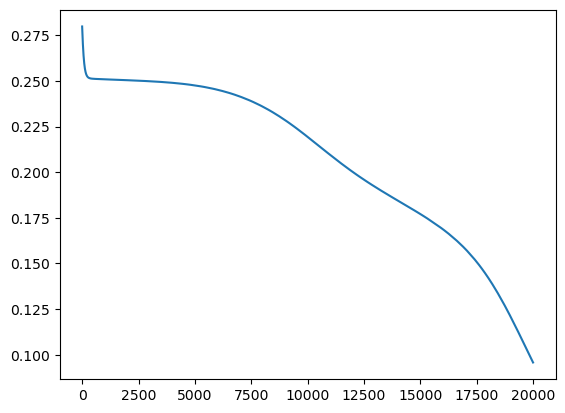

In [31]:
# loss값을 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

## Tensorflow Data API

In [32]:
# 메모리에서 데이터 생성
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
print(dataset)

dataset = tf.data.Dataset.range(10)
print(dataset)

for item in dataset :
    print(item)


<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [33]:
dataset = dataset.repeat(3).batch(5) #3번 반복하고 5개씩 묶어서
for item in dataset :
    print(item)

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)


In [34]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.repeat(3).batch(8, drop_remainder=True) #3번 반복하고 8개씩 묶고 나머지는 버리기
for item in dataset :
    print(item)

tf.Tensor([0 1 2 3 4 5 6 7], shape=(8,), dtype=int64)
tf.Tensor([8 9 0 1 2 3 4 5], shape=(8,), dtype=int64)
tf.Tensor([6 7 8 9 0 1 2 3], shape=(8,), dtype=int64)


In [35]:
dataset = tf.data.Dataset.range(10)

# 데이터를 변환할 때 스레드 2개를 사용
dataset = dataset.map(lambda x : x * 2, num_parallel_calls=2)
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)


In [36]:
dataset = tf.data.Dataset.range(10)

for item in dataset.take(3):
    print(item)
    

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


In [37]:
# 셔플링
# 0 ~ 29까지의 숫자를 가지고 텐서를 생성
dataset = tf.data.Dataset.range(30)
# 버퍼의 크기는 5로 설정하고 seed는 42로 고정해서 일정하게 배치한 후 6개씩 묶어서 사용
dataset = dataset.shuffle(buffer_size=5, seed=42).batch(6)
for item in dataset :
    print(item)
    

tf.Tensor([0 2 3 6 7 9], shape=(6,), dtype=int64)
tf.Tensor([ 4  5 10  1 11  8], shape=(6,), dtype=int64)
tf.Tensor([16 15 14 18 17 21], shape=(6,), dtype=int64)
tf.Tensor([22 23 20 25 24 12], shape=(6,), dtype=int64)
tf.Tensor([27 28 19 29 13 26], shape=(6,), dtype=int64)


In [38]:
# 데이터를 읽어서 나누어 저장한 후 읽어오기
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

# train-훈련, valid-훈련 중 검증, test-모델을 훈련한 후 확인
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target.reshape(-1,1),random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_mean = scaler.mean_
X_std = scaler.scale_
print(X_mean)
print(X_std)

[ 3.89175860e+00  2.86245478e+01  5.45593655e+00  1.09963474e+00
  1.42428122e+03  2.95886657e+00  3.56464315e+01 -1.19584363e+02]
[1.90927329e+00 1.26409177e+01 2.55038070e+00 4.65460128e-01
 1.09576000e+03 2.36138048e+00 2.13456672e+00 2.00093304e+00]


In [39]:
import os
# 데이터를 여러 개의 파일로 나누어서 저장하는 함수
# 매개변수는 데이터, 파일의 맨 앞의 공통된 이름, 헤더 포함 여부, 파일의 개수

def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
  # 파일을 저장 할 디렉토리 생성
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
  # 파일 경로 패턴 생성
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")
    filepaths = []
    m = len(data)
  # m 개수 만큼 숫자열을 만든 후 n_parts 개수 만큼 분할해서
  # 분할한 그룹 번호는 file_idx에 행 번호는 row_indices에 저장
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
    # 실제 파일 경로 생성
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
    # 데이터 기록하기
    with open(part_csv, "wt", encoding="utf-8") as f:
        if header is not None:
            f.write(header)
            f.write("\n")
        #  행 인덱스를 가지고 데이터를 순회하면 각 데이터를 ,로 구분해서 작성
        for row_idx in row_indices:
            f.write(",".join([repr(col) for col in data[row_idx]]))
            f.write("\n")
    return filepaths 
    
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]

headers_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(headers_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)
    

In [40]:
# 파일 이름을 랜덤하게 가져오기
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'datasets\\housing\\my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_14.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_13.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_15.csv', sh

In [41]:
# 5개의 파일에서 번갈아가면서 데이터를 읽어오기
n_readers = 5

# 파일 경로에 있는 내용을 5개씩 번갈아가면서(interleave) 줄단위로 읽어오기
dataset = filepath_dataset.interleave(lambda filepath: tf.data.TextLineDataset(filepath).skip(1), cycle_length=n_readers)
for line in dataset.take(5):
    print(line.numpy())

b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418'
b'2.4792,24.0,3.4547038327526134,1.1341463414634145,2251.0,3.921602787456446,34.18,-118.38,2.0'
b'4.2708,45.0,5.121387283236994,0.953757225433526,492.0,2.8439306358381504,37.48,-122.19,2.67'
b'2.1856,41.0,3.7189873417721517,1.0658227848101265,803.0,2.0329113924050635,32.76,-117.12,1.205'
b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215'


In [42]:
!pip install tensorflow-datasets

In [43]:
import tensorflow_datasets as tfds

Datasets = tfds.load(name="mnist")
mnist_train, mnist_test = Datasets["train"], Datasets["test"]

ModuleNotFoundError: No module named 'resource'

In [45]:
mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)

for item in mnist_train:
    images = item["image"]
    labels = item["label"]
    for index in range(5):
        plt.subplot(1, 5, index + 1)
    image = images[index, ..., 0]
    label = labels[index].numpy()
    plt.imshow(image, cmap="binary")
    plt.title(label)
    plt.axis("off")
  break # just showing part of the first batch

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 13)

In [46]:
# 입력 차원이 1개인 단순 선형 회귀

X = np.arange(1, 6)
y = 3 * x + 2

# 모델 만들기
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]), 
])



In [47]:
# 모델의 구조 확인
model.summary()
# param이 2개인 이유는 입력차원1개 + 편향 = 총 2개


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# 컴파일(sgd : 경사하강법)
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

# 컴파일(축약해서 작성)
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

# 매개변수를 인스턴스나 함수 또는 변수로 설정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.losses.MeanSquaredError(), tf.keras.losses.MeanAbsoluteError()])

In [49]:
# 훈련
# verbose = 0을 추가하면 훈련 과정의 내용이 출력되지 않음
# history = model.fit(X,y,epochs=2000, verbos=0)
history = model.fit(X,y,epochs=2000)

ValueError: Data cardinality is ambiguous:
  x sizes: 5
  y sizes: 3
Make sure all arrays contain the same number of samples.

In [ ]:
# 훈련 과정에서 발생하는 손실 값과 평가 지표 시각화

for key in history.history:
    print(key)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mean_absolute_error'], label='mae')
plt.xlim(-1, 200)
plt.ylim(0, 1)
plt.title("Loss")
plt.legend()
plt.show()

In [50]:
# 검증
model.evaluate(X, y)

ValueError: Data cardinality is ambiguous:
  x sizes: 5
  y sizes: 3
Make sure all arrays contain the same number of samples.

In [51]:
# 예측
model.predict([10])


1/1 [==============================] - 0s 52ms/step


array([[-11.32435]], dtype=float32)

## 데이터 가져오기

In [52]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [53]:
# 타겟 만들기
red['type']=0
white['type']=1

# 2개의 데이터를 세로방향으로 합치기
wine = pd.concat([red,white])
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

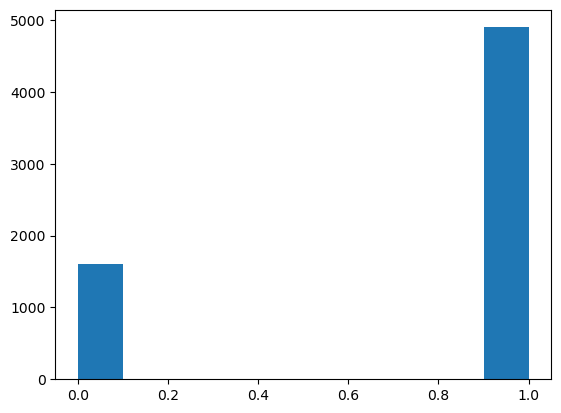

In [54]:
# 타겟의 분포 확인
plt.hist(wine['type'])
plt.show()
# 3배 정도 차이가 나는데 이 정도는 괜찮음

In [55]:
# 데이터 정규화
# sklearn의 MinMaxScaler를 이용한 것과 동일 : 최대값은 1 최소값은 0

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [56]:
# 데이터 샘플링
wine_shuffle = wine_norm.sample(frac=1) # 데이터를 섞어서 리턴 - frac은 데이터의 비율
print(wine_shuffle.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3263       0.223140          0.120000     0.186747        0.046012   0.034884   
18         0.297521          0.173333     0.253012        0.007669   0.039867   
329        0.570248          0.253333     0.234940        0.021472   0.086379   
1605       0.272727          0.120000     0.295181        0.024540   0.038206   
921        0.380165          0.186667     0.192771        0.024540   0.119601   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
3263             0.121528              0.198157  0.060729  0.387597   
18               0.055556              0.380184  0.088490  0.310078   
329              0.020833              0.020737  0.211876  0.356589   
1605             0.104167              0.246544  0.061500  0.503876   
921              0.107639              0.168203  0.179102  0.449612   

      sulphates   alcohol   quality  type  
3263   0.224719  0.666667  0.833333   1.0 

In [57]:
# pandas의 DataFrame을 numpy 배열로 변환
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

[[0.2231405  0.12       0.18674699 0.04601227 0.03488372 0.12152778
  0.19815668 0.06072874 0.3875969  0.2247191  0.66666667 0.83333333
  1.        ]
 [0.29752066 0.17333333 0.25301205 0.00766871 0.03986711 0.05555556
  0.38018433 0.08849046 0.31007752 0.1741573  0.47826087 0.5
  1.        ]
 [0.57024793 0.25333333 0.23493976 0.02147239 0.08637874 0.02083333
  0.02073733 0.21187584 0.35658915 0.2247191  0.2173913  0.33333333
  0.        ]
 [0.27272727 0.12       0.29518072 0.02453988 0.03820598 0.10416667
  0.24654378 0.0614999  0.50387597 0.11235955 0.71014493 1.
  1.        ]
 [0.38016529 0.18666667 0.19277108 0.02453988 0.11960133 0.10763889
  0.16820276 0.1791016  0.4496124  0.28089888 0.43478261 0.5
  0.        ]]


In [58]:
# 훈련에 사용할 데이터로 생성
train_idx = int(len(wine_np) * 0.8)

#train_idx 기준으로 행 단위로 분할해서 train과 test로 분할하고
#맨 마지막 열을 기준으로 열 단위로 분할해서 feature와 target으로 분리

train_X, train_y = wine_np[:train_idx, :-1], wine_np[:train_idx:, -1]
test_X, test_y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

# 레드와 화이트로 분류할 것이라서 타겟을 원 핫 인코딩 수행
train_y = tf.keras.utils.to_categorical(train_y, num_classes=2)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=2)
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

(5197, 12) (1300, 12)
(5197, 2) (1300, 2)


In [59]:
# 분류 모델
# 이항 분류이고 피처의 개수가 12개
# 첫 번째 입력 층의 input_shape는 무조건(12,)
# 맨 마지막 출력 층의 units는 클래스 개수이므로 2 그리고 다항 분류이므로 activation은 softmax
# 중간 층들의 units는 마음대로 설정 가능하지만 activation은 존재하는 이름을 사용해야 함
"""
model = keras.models.Sequential([
    keras.layers.Dense(Unit=?, activation=?, input_shape=(입력피쳐의 개수,)),
    keras.layers.Dense(1)
])
"""

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
# 최적화 함수는 Adam이고 학습률은 0.03
# 손실 함수는 카테고리 크로스 엔트로피
# 평가 지표는 정확도
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.03), 
loss='categorical_crossentropy', metrics=['accuracy'])


# 구조 확인
model.summary()


# 훈련
history = model.fit(train_X,train_y,epochs=25)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 48)                624       
                                                                 
 dense_4 (Dense)             (None, 24)                1176      
                                                                 
 dense_5 (Dense)             (None, 12)                300       
                                                                 
 dense_6 (Dense)             (None, 2)                 26        
                                                                 
Total params: 2126 (8.30 KB)
Trainable params: 2126 (8.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
163/163 [==============================] - 1s 1ms/step - loss: 0.2982 - accuracy: 0.8807
Epoch 2/25
163/163 [==============================] - 

In [60]:
# 훈련
# validation_split을 설정하면 그 비율만큼을 검증 데이터로 사용해서 검증을 수행
# batch_size는 데이터를 분할해서 학습을 수행
history = model.fit(train_X, train_y, epochs=25, validation_split=0.25, batch_size=64)


Epoch 1/25
61/61 [==============================] - 0s 5ms/step - loss: 0.0243 - accuracy: 0.9949 - val_loss: 0.0213 - val_accuracy: 0.9954
Epoch 2/25
61/61 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9954 - val_loss: 0.0225 - val_accuracy: 0.9962
Epoch 3/25
61/61 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9951 - val_loss: 0.0231 - val_accuracy: 0.9962
Epoch 4/25
61/61 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9959 - val_loss: 0.0218 - val_accuracy: 0.9954
Epoch 5/25
61/61 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9944 - val_loss: 0.0235 - val_accuracy: 0.9946
Epoch 6/25
61/61 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9946 - val_loss: 0.0216 - val_accuracy: 0.9962
Epoch 7/25
61/61 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9954 - val_loss: 0.0223 - val_accuracy: 0.9962
Epoch 8/25
61/61 [==

In [61]:
# 평가
model.evaluate(test_X, test_y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 0.9977


[0.007772688288241625, 0.9976922869682312]

## 품질을 3가지로 나누어서 분류

In [62]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

# 3~5를 0, 6을 1, 7~9를 2로 그룹화


count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [63]:
# 타겟 생성

wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2
print(wine.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  new_quality  
0      9.4        5     0          0.0  
1   

In [64]:
# 피처 정규화
# del wine['quality']

wine_backup = wine.copy() # 복제본 생성

# 타겟을 제외한 부분을 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
print(wine_norm.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  new_quality  
0  0.202899  

In [65]:
# 훈련 데이터와 테스트 데이터를 분할
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()
train_idx = int(len(wine_np) * 0.8)
train_X, train_y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
# 타겟을 원 핫 인코딩 하기
train_y = tf.keras.utils.to_categorical(train_y, num_classes=3)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=3)


In [66]:
# 모델 만들기
# 12, 3, softmax는 값을 정확하게 넣어줘야 하고 나머지는 잘 판단해서 넣으면 됨
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_X, train_y, epochs=25, batch_size=32, validation_split=0.25)


Epoch 1/25


ValueError: in user code:

    File "C:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 12), found shape=(None, 13)


In [67]:
# 평가
model.evaluate(test_X, test_y)

ValueError: in user code:

    File "C:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1850, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 12), found shape=(None, 13)


In [68]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [69]:
print('데이터 구조:', X_train_full.shape)
print('데이터 타입:', X_train_full.dtype)

데이터 구조: (60000, 28, 28)
데이터 타입: uint8


### 훈련 데이터 와 테스트 데이터를 나누고 0~1 사이로 스케일링

In [70]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

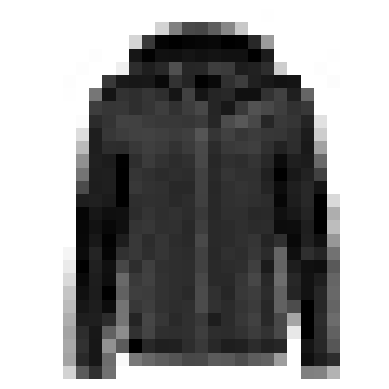

In [71]:
# 이미지 출력
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

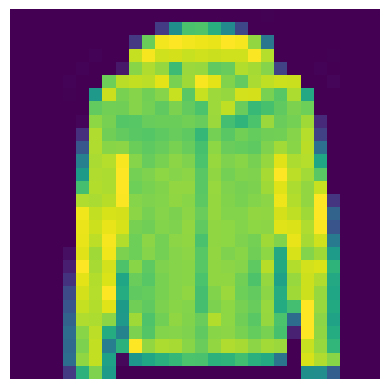

In [72]:
# 이미지 출력(컬러)
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

In [73]:
# 레이블이 숫자로 되어 있음
print(y_train) #0 ~ 9
# 유저 입장에서는 숫자 보다는 문자열로 보여지는 것이 좋음
# 레이블 별 품목 명을 리스트로 생성
# 대표하는 이미지로 생성해두는 것도 좋음
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(class_names[y_train[0]])

[4 0 7 ... 3 0 5]
Coat


In [74]:
# 데이터 개수 확인
print('학습 데이터:', X_train_full.shape)
print('테스트 데이터:', X_test.shape)
print('검증 데이터:', X_valid.shape)

학습 데이터: (60000, 28, 28)
테스트 데이터: (10000, 28, 28)
검증 데이터: (5000, 28, 28)


그림 저장: fashion_mnist_plot


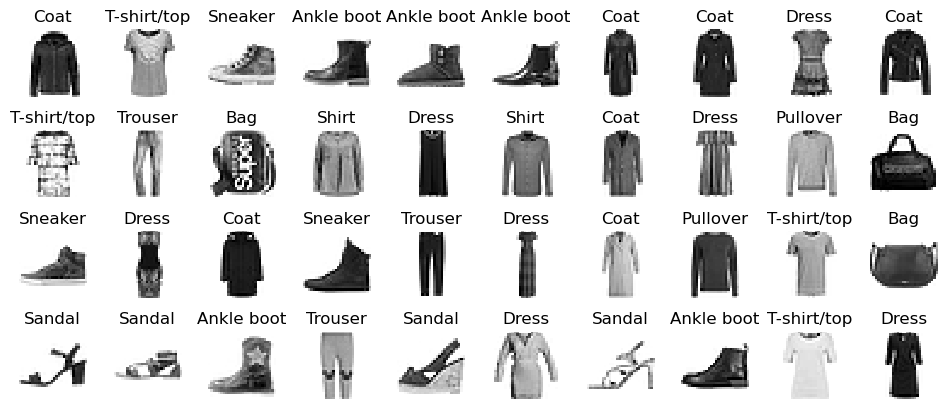

In [77]:
# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "keras_multilayer_perceptron"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# 행 개수
n_rows = 4
# 열 개수
n_cols = 10
# 캔버스 사이즈 설정
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

# 행 개수와 열 개수만큼 순회
for row in range(n_rows):
    for col in range(n_cols):
        # 행 번호와 열 번호를 가지고 인덱스를 생성
        index = n_cols * row + col
        # 캔버스 안에 작은 캔버스를 순서대로 생성
        plt.subplot(n_rows, n_cols, index + 1)
        # 캔버스에 이미지를 하나씩 출력
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        # plt는 출력할 때 축을 만들어주는데 축을 만들지 않도록 설정(그림 출력할때는 축 제거 해주는게 좋음)
        plt.axis('off')
        # 문자열 출력
        plt.title(class_names[y_train[index]], fontsize=12)
# 작은 캔버스들 사이에 여백을 설정
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# 로컬에 이미지로 저장하는 것이고 첫 번째가 이미지 파일 명
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [78]:
print(f'변경전 shape: {X_train.shape}')
# reshape를 할 때 -1을 설정하면 나머지를 모두 설정하고 남는 것을 하나의 차원으로 생성
print(f'1D로 shape 변경 후: {X_train.reshape(55000, -1).shape}')

변경전 shape: (55000, 28, 28)
1D로 shape 변경 후: (55000, 784)


In [79]:
print(f'변경전 shape: {X_train.shape}')
# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(X_train).shape}')

변경전 shape: (55000, 28, 28)
Flatten 적용 후: (55000, 784)


In [80]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
# 뉴런의 개수가 128개인 relu를 활성화 함수를 사용하는 완전 연결 층을 생성
tf.keras.layers.Dense(128, activation='relu')

In [81]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
# Sequentail API에 층을 추가하는 방법
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128), 
    tf.keras.layers.Activation('relu')
])

In [82]:
# 모델 생성
model = keras.models.Sequential()
# 입력 층 - 이미지의 경우는 1차원으로 변경 하고 차원을 설정, activation은 설정하지 않아도 됨
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# 히든 층 - 이 층의 개수가 많아서 Deep Learning
# 개수 제한은 없으나 일반적으로 뉴런의 개수는 줄어드는 방향으로 설정함
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# 출력 층
# 출력 층의 뉴런의 개수는 출력하는 데이터의 개수
# 분류는 클래스 개수이고 회귀는 1
model.add(keras.layers.Dense(10, activation="softmax"))

In [83]:
# 루프에서 많은 모델을 생성하는 경우이 전역 상태는 시간이 지남에 따라 증가하는 메모리를 소비하므로 이를 지울 수 있습니다. 
# clear_session() 호출 하면 전역 상태가 해제됩니다. 
# 이는 특히 메모리가 제한된 경우 이전 모델 및 레이어의 혼란을 방지하는 데 도움이됩니다.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [114]:
# 모델 생성
# 층을 하나씩 추가하지 않고 Sequential 모델을 만들 때 층의 리스트를 전달해도 됨
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(600, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [115]:
# 모델 확인
model.layers

In [92]:
!pip install graphviz

In [90]:
!pip install pydot

In [95]:
# 모델을 이미지로 출력
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [96]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [97]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

In [107]:
# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

In [117]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=adam)

In [118]:
# 모델 컴파일
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [119]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 18s 10ms/step - loss: 0.5147 - accuracy: 0.8130 - val_loss: 0.3882 - val_accuracy: 0.8568
Epoch 2/50
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3803 - accuracy: 0.8610 - val_loss: 0.4195 - val_accuracy: 0.8530
Epoch 3/50
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3448 - accuracy: 0.8726 - val_loss: 0.3308 - val_accuracy: 0.8758
Epoch 4/50
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3165 - accuracy: 0.8856 - val_loss: 0.3306 - val_accuracy: 0.8820
Epoch 5/50
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2999 - accuracy: 0.8893 - val_loss: 0.3123 - val_accuracy: 0.8854
Epoch 6/50
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2832 - accuracy: 0.8964 - val_loss: 0.3249 - val_accuracy: 0.8862
Epoch 7/50
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2718 - accuracy: 0.8993 - val_loss: 0.3111 - val_a

그림 저장: keras_learning_curves_plot


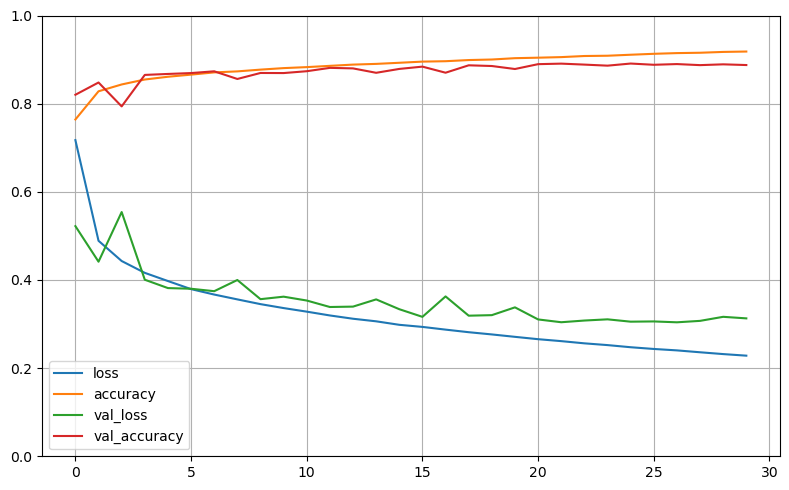

In [112]:
# 학습 곡선

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [120]:
# 일반화 오차
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5563 - accuracy: 0.8920


[0.5563474893569946, 0.8920000195503235]

In [121]:
# 새로운 데이터가 없어서 3번째 데이터로 예측
X_new = X_test[:3]
# 각 클래스별 확률
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 72ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [122]:
# 확률이 가장 높은 인덱스를 출력
# y_pred = model.predict_classes(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 29ms/step


array([9, 2, 1], dtype=int64)

그림 저장: fashion_mnist_images_plot


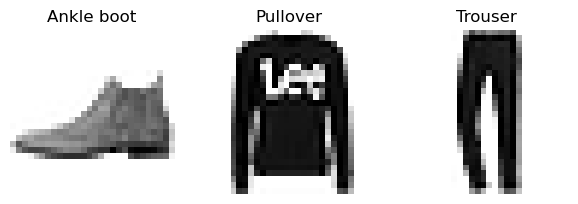

In [123]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

### 다항 회귀

In [124]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [125]:
np.random.seed(42)
tf.random.set_seed(42)

In [126]:
# 모델 생성 - hidden 층 없이 생성
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# 잔차 제곱합을 손실 함수로 사용하고 옵티마이저는 경사 하강법
# 학습률은 0.003
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

# 모델 훈련 - 검증 데이터를 직접 설정했고 훈련 횟수는 20번
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
# 평가
mse_test = model.evaluate(X_test, y_test)
# 예측
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8021 - val_loss: 2.0704
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5085 - val_loss: 7.3983
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5115 - val_loss: 4.3699
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4340 - val_loss: 1.9487
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4131 - val_loss: 0.5684
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3982 - val_loss: 0.4791
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3963 - val_loss: 0.3588
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3865 - val_loss: 0.3655
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3814 - val_loss: 0.3744
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3780 - val_loss: 0.3979

In [127]:
print(y_test[:3])
print(y_pred)

[0.477   0.458   5.00001]
[[0.73054445]
 [1.6718917 ]
 [4.1404767 ]]


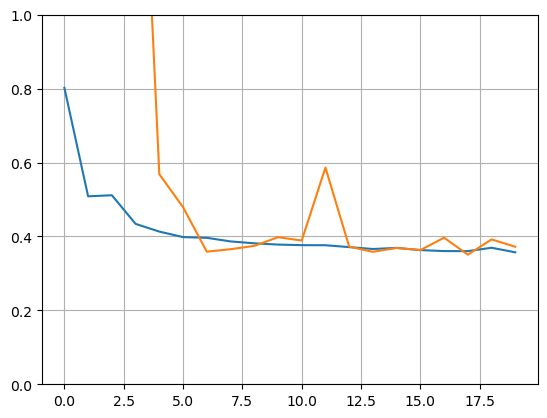

In [128]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 함수형 모델

In [129]:
np.random.seed(42)
tf.random.set_seed(42)

# 입력 층 생성 - 입력 층은 unit이나 활성화 함수가 의미가 없음
input_ = keras.layers.Input(shape=X_train.shape[1:])

# input_ 다음에 연결되는 층을 생성
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

# hidden1의 출력을 입력으로 받는 층을 생성
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# 이 층은 input_나 hidden2의 출력을 입력으로 받는 층을 생성
# 연결만 시켜주는 층이라서 뉴런의 개수나 활성화 함수는 의미가 없음
# input_와 hidden2의 출력을 입력으로 사용하는 층
concat = keras.layers.concatenate([input_, hidden2])

# concat의 출력을 입력으로 받는 출력 층 생성
output = keras.layers.Dense(1)(concat)

# 함수형 모델 생성 - inputs에 Input층을 outputs에 Output 층을 설정하면 됨
model = keras.models.Model(inputs=[input_], outputs=[output])


In [130]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6933 - val_loss: 0.8380
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4620 - val_loss: 5.1819
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5506 - val_loss: 2.3863
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4016 - val_loss: 0.9959
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4011 - val_loss: 14.6124
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6352 - val_loss: 12.4731
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7356 - val_loss: 2.0699
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3942 - val_loss: 96.0180
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5233 - val_loss: 125.1760
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 2.2136 - val_loss: 1

1/1 [==============================] - 0s 65ms/step


### input이 2개인 경우

In [131]:
np.random.seed(42)
tf.random.set_seed(42)

# 입력이 2개 - 입력 데이터를 두 묶음으로 나누어서 각각의 레이어로 전송
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

# input_B의 출력을 입력으로 사용
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
# hidden1의 출력을 입력으로 사용
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# input_A의 출력과 hidden2의 출력을 하나로 묶어주는 층 - 실제적인 연산은X
concat = keras.layers.concatenate([input_A, hidden2])
# 출력은 concat의 출력을 입력으로 받아서 처리
output = keras.layers.Dense(1, name="output")(concat)

# 모델을 만들 때 2개의 입력을 사용하도록 설정
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [132]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# 입력을 2개로 만들어야 하기 때문에 데이터를 다시 분리
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7619 - val_loss: 0.4443
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4497 - val_loss: 0.4204
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4399 - val_loss: 0.4464
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4080 - val_loss: 1.4175
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4033 - val_loss: 4.7736
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4535 - val_loss: 1.4250
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4014 - val_loss: 2.3666
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3965 - val_loss: 20.5601
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4235 - val_loss: 4.5602
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4148 - val_loss: 1.158

1/1 [==============================] - 0s 57ms/step


## 다중 출력

In [133]:
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

# 출력층
output = keras.layers.Dense(1, name="main_output")(concat)
# 출력층
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

#보초 출력 추가하기_입력2개, 출력2개
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [134]:
# 회귀라서 둘 다 mse로 지정함, loss_weights는 가중치(loss1 * 0.9 + loss2 * 0.1), 
# loss_weights에 대해서 예를 들면, 자율 주행의 경우 사람을 더 잘 구별해야 하니까 사람에 높은 가중치를 주고 그 다음은 자동차 건물

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [135]:
# 입력2개 출력2개 validation_data도 입력2개 출력2개
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9194 - main_output_loss: 0.7996 - aux_output_loss: 1.9973 - val_loss: 3.5352 - val_main_output_loss: 3.7908 - val_aux_output_loss: 1.2346
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5741 - main_output_loss: 0.5127 - aux_output_loss: 1.1271 - val_loss: 1.7257 - val_main_output_loss: 1.7070 - val_aux_output_loss: 1.8946
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5141 - main_output_loss: 0.4655 - aux_output_loss: 0.9517 - val_loss: 0.4636 - val_main_output_loss: 0.4200 - val_aux_output_loss: 0.8561
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4622 - main_output_loss: 0.4240 - aux_output_loss: 0.8056 - val_loss: 0.4407 - val_main_output_loss: 0.4063 - val_aux_output_loss: 0.7497
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4436 - main_output_loss: 0.4126 - aux_output_loss: 0.7231 - val_loss

In [136]:
# 모델 평가
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main)
print(y_pred_aux)

1/1 [==============================] - 0s 64ms/step
[[0.5357893]
 [1.614542 ]
 [3.587632 ]]
[[0.76529384]
 [1.8301842 ]
 [3.1631095 ]]


### Sub Classing

In [137]:
# Model 클래스 상속
class WideAndDeepModel(keras.models.Model):
    # __init__은 파이썬 클래스의 초기화 함수 - 생성자와 유사
    # __init__을 Overriding(재정의)할 때는 상위 클래스의 __init__을 반드시 호출
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    # 모델이 수행할 동작을 가지는 메서드
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output


# Model 인스턴스를 만들면 __init__에 작성한 내용이 자동으로 수행됨
model = WideAndDeepModel(30, activation="relu")

In [138]:
# 컴파일
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 2ms/step - loss: 0.9466 - output_1_loss: 0.8092 - output_2_loss: 2.1833 - val_loss: 4.8530 - val_output_1_loss: 5.2443 - val_output_2_loss: 1.3316
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6128 - output_1_loss: 0.5470 - output_2_loss: 1.2048 - val_loss: 5.7255 - val_output_1_loss: 5.4206 - val_output_2_loss: 8.4693
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5398 - output_1_loss: 0.4909 - output_2_loss: 0.9799 - val_loss: 0.9877 - val_output_1_loss: 0.9979 - val_output_2_loss: 0.8956
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4624 - output_1_loss: 0.4261 - output_2_loss: 0.7885 - val_loss: 0.4566 - val_output_1_loss: 0.4265 - val_output_2_loss: 0.7275
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4436 - output_1_loss: 0.4154 - output_2_loss: 0.6971 - val_loss: 0.4073 - val_output_1_loss: 0.3787 - val_ou

### 모델 저장 과 복원

In [139]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [140]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8120 - val_loss: 0.6157
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4658 - val_loss: 0.7029
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4153 - val_loss: 4.4161
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4122 - val_loss: 6.5291
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3936 - val_loss: 9.3604
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4362 - val_loss: 0.9093
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3700 - val_loss: 0.3658
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3573 - val_loss: 0.3413
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3509 - val_loss: 0.3323
Epoch 10/10
162/162 [==============================] - 0s 952us/step - loss: 0.3388


In [141]:
# 모델을 저장
model.save("my_keras_model.h5")

C:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [142]:
# 복원
model = keras.models.load_model("my_keras_model.h5")

In [143]:
model.predict(X_new)

1/1 [==============================] - 0s 66ms/step


array([[0.70155406],
       [1.7944279 ],
       [4.388312  ]], dtype=float32)

In [144]:
# 가중치만 저장
model.save_weights("weights.ckpt")


## 콜백

### 모델 체크포인트

In [145]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])   

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
# 체크 포인트 생성
# 체크 포인트 이름은 my_keras_model.h5
# 최적의 모델을 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
# 모델을 훈련시킬 때 콜백을 설정
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb]) # 리스트 형태로 넣기
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7504 - val_loss: 0.4574
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4375 - val_loss: 0.5823
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4047 - val_loss: 0.4001
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3867 - val_loss: 0.7354
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3791 - val_loss: 0.4333
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3692 - val_loss: 0.8257
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3862 - val_loss: 1.5511
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3667 - val_loss: 2.9212
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3737 - val_loss: 1.1001
Epoch 10/10
162/162 [==============================] - 0s 851us/step - loss: 0.3825


In [146]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
# 조기 종료
# patience 동안 loss가 줄어들지 않으면 훈련을 조기 중단하는 callback
# patience=10 -> 10번 줄어들지 않으면 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3883 - val_loss: 0.5354
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3795 - val_loss: 3.1149
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4157 - val_loss: 1.3660
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3703 - val_loss: 4.8677
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3843 - val_loss: 4.1890
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3953 - val_loss: 1.0065
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3703 - val_loss: 0.9912
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3582 - val_loss: 1.7143
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3603 - val_loss: 0.3650
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3487 - val_lo

### 학습률 스케쥴러

In [147]:
def scheduler(epoch, lr):
    tf.print(f'learning_rate: {lr:.5f}')
    # 첫 5 에포크 동안 유지
    if epoch < 5:
        return lr
    else:
    # 학습률 감소 적용
        return lr * tf.math.exp(-0.1)

# 콜백 객체생성 및 scheduler 함수 적용
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [148]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
# 초기 학습률 확인(0.01)
print(round(model.optimizer.lr.numpy(), 5))

0.01


In [149]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

# 최종 학습률 스케줄러 확인
round(model.optimizer.lr.numpy(), 5)

learning_rate: 0.01000
Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2813 - val_loss: 0.3024 - lr: 0.0100
learning_rate: 0.01000
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2811 - val_loss: 0.2790 - lr: 0.0100
learning_rate: 0.01000
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2806 - val_loss: 0.2855 - lr: 0.0100
learning_rate: 0.01000
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2795 - val_loss: 0.2796 - lr: 0.0100
learning_rate: 0.01000
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2794 - val_loss: 0.3048 - lr: 0.0100
learning_rate: 0.01000
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2782 - val_loss: 0.2863 - lr: 0.0090
learning_rate: 0.00905
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2772 - val_loss: 0.2911 - lr: 0.0082
learning_rate: 0.00819
Epoch 8/100
363/36

363/363 [==============================] - 1s 2ms/step - loss: 0.2627 - val_loss: 0.2702 - lr: 4.5166e-05
learning_rate: 0.00005
Epoch 60/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2627 - val_loss: 0.2702 - lr: 4.0868e-05
learning_rate: 0.00004
Epoch 61/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2627 - val_loss: 0.2702 - lr: 3.6979e-05
learning_rate: 0.00004
Epoch 62/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2627 - val_loss: 0.2702 - lr: 3.3460e-05
learning_rate: 0.00003
Epoch 63/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2627 - val_loss: 0.2702 - lr: 3.0276e-05
learning_rate: 0.00003
Epoch 64/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2627 - val_loss: 0.2702 - lr: 2.7394e-05
learning_rate: 0.00003
Epoch 65/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2627 - val_loss: 0.2702 - lr: 2.4788e-05
learning_rate: 0.00002
Epoch 66/100
363/36

0.0

In [150]:
# 사용자 정의 롤백
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

350/363 [===========================>..] - ETA: 0s - loss: 0.2619
val/train: 1.03
363/363 [==============================] - 1s 2ms/step - loss: 0.2626 - val_loss: 0.2702


### 텐서보드를 이용한 시각화

In [151]:
# 로그를 저장하기 위한 디렉토리 경로를 설정
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir


'.\\my_logs\\run_2023_09_15-16_42_59'

In [152]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

#텐서보드 저장
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.9156 - val_loss: 7.4412
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6143 - val_loss: 0.7775
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4026 - val_loss: 2.6951
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4065 - val_loss: 12.4758
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4150 - val_loss: 23.5713
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6561 - val_loss: 1.1076
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3717 - val_loss: 0.6973
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3549 - val_loss: 7.7870
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3497 - val_loss: 1.0665
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3856 - val_loss: 4.24

In [153]:
# 텐서보드 실행
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

### 신경망 하이퍼파라미터 튜닝

In [154]:
# 함수 생성
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [157]:
# 더 이상 Tensorflow에서 sklearn의 래퍼를 제공하지 않아서 사용하고자 하면 scikeras 패키지를 이용

!pip install scikeras



In [158]:
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_model())